#MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA

Curso: TC5044.10 - Operaciones de aprendizaje automático (Gpo 10)

Tecnológico de Monterrey

Dr. Gerardo Rodríguez Hernández

Fase 1 | Avance de Proyecto Equipo 58
- Data engineer: Genaro Mateu A00822623
- Data scientist: Diego Ramirez Moreno a01795699
- ML engineer Ali Alfonso Rico Vázquez A01350630
- Devops: Jorge Santana Mendoza  A01376306
- Softeware Engineer: Angel Garcia A01796653



In [116]:
!pip install dvc

In [117]:
#ejecutar esto si no existe la carpeta .dvc
#!dvc init

#si ya se tiene la carpeta sólo verificamos su estatus
!dvc status

#si se tiene la carpeta pero se quiere reiniciar se usa:
#!dvc init -f


eda:
	changed deps:
		modified:           eda.py
	changed outs:
		modified:           insurance_company_cleaned_modified.csv
model:
	changed deps:
		modified:           insurance_company_cleaned_modified.csv
		modified:           model.py
	changed outs:
		deleted:            model_output.csv


In [118]:
# Configura tu nombre y correo (ajústalos si quieres)
!git config --global user.name "Equipo58"
!git config --global user.email "e58@example.com"

# Ignora carpetas del sistema y de Google Drive
!echo ".config/" >> .gitignore
!echo "sample_data/" >> .gitignore
!echo "drive/" >> .gitignore

# Inicializa (o reusa) el repositorio Git
!git init

# Agrega solo tu archivo importante y el .gitignore
!git add insurance_company_modified.csv .gitignore

# Crea el commit con todo configurado y limpio
!git commit -m "Inicializo repo con DVC y versiono dataset principal"


Reinitialized existing Git repository in /content/.git/
[master 1a7b7e8] Inicializo repo con DVC y versiono dataset principal
 1 file changed, 3 insertions(+)


In [119]:
#Cargamos la librería de drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
import os
#DIR = "/content/drive/MyDrive/MNA 2024/MLOps/Tareas"
#os.chdir(DIR)

In [121]:
import pandas as pd
data_df = pd.read_csv('insurance_company_modified.csv', header=None)

data_df

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,33,1,3,2,8,0,5,1.1,3.1,7,...,0.38,0.39,1.13,0.40,0.41,0.42,0.43,0.44,0.45,mixed_type_col
1,37.0,1.0,2.0,2.0,8.0,1.0,4.0,?,4.0,6.0,...,0.0,0.0,1.0,invalid,0.0,0.0,0.0,0.0,0.0,108
2,37.0,1.0,2.0,2.0,8.0,0.0,4.0,2.0,4.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
3,9.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,904
4,40.0,1.0,4.0,2.0,10.0,1.0,4.0,1.0,4.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,NaN,1.0,2.0,2.0,5.0,0.0,4.0,2.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,687
5934,41.0,449.0,3.0,3.0,10.0,0.0,4.0,1.0,4.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5935,2.0,1.0,2.0,3.0,1.0,1.0,5.0,1.0,3.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5936,8.0,1.0,2.0,4.0,2.0,0.0,4.0,0.0,5.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,573


Se va a utilizar el siguiente diccionario: http://kdd.ics.uci.edu/databases/tic/dictionary.txt
Para identificar las columnas y los valores de cada una de ellas

In [122]:
column_names = [
    'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE',
    'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF',
    'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR',
    'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512',
    'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT',
    'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL',
    'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO',
    'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND',
    'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND', 'CARAVAN','MIXED_TYPE'
]

In [123]:
data_df.columns = column_names

In [124]:
# --- Análisis Exploratorio Básico (EDA) ---

# 1. Visualizar las primeras 5 filas del dataset
print("\n--- 1. Primeras 5 filas del DataFrame ---")
data_df.head()


--- 1. Primeras 5 filas del DataFrame ---


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,MIXED_TYPE
0,33,1,3,2,8,0,5,1.1,3.1,7,...,0.38,0.39,1.13,0.40,0.41,0.42,0.43,0.44,0.45,mixed_type_col
1,37.0,1.0,2.0,2.0,8.0,1.0,4.0,?,4.0,6.0,...,0.0,0.0,1.0,invalid,0.0,0.0,0.0,0.0,0.0,108
2,37.0,1.0,2.0,2.0,8.0,0.0,4.0,2.0,4.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
3,9.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,904
4,40.0,1.0,4.0,2.0,10.0,1.0,4.0,1.0,4.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bad


In [125]:
# 2. Obtener un resumen de la estructura del DataFrame
# Esto nos muestra el número de filas, columnas, y el tipo de dato de cada columna.
# También nos da una primera idea de cuántos valores no nulos hay.
print("\n--- 2. Información general del DataFrame con datos convertidos a número ---")
data_df.info()




--- 2. Información general del DataFrame con datos convertidos a número ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 87 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MOSTYPE     5870 non-null   object
 1   MAANTHUI    5865 non-null   object
 2   MGEMOMV     5874 non-null   object
 3   MGEMLEEF    5869 non-null   object
 4   MOSHOOFD    5878 non-null   object
 5   MGODRK      5864 non-null   object
 6   MGODPR      5859 non-null   object
 7   MGODOV      5875 non-null   object
 8   MGODGE      5876 non-null   object
 9   MRELGE      5877 non-null   object
 10  MRELSA      5872 non-null   object
 11  MRELOV      5872 non-null   object
 12  MFALLEEN    5872 non-null   object
 13  MFGEKIND    5853 non-null   object
 14  MFWEKIND    5878 non-null   object
 15  MOPLHOOG    5867 non-null   object
 16  MOPLMIDD    5875 non-null   object
 17  MOPLLAAG    5875 non-null   object
 18  MBERHOOG   

In [126]:
for column in data_df.columns:
    data_df[column] = pd.to_numeric(data_df[column], errors='coerce')

In [127]:
# 3. Obtener estadísticas descriptivas para las columnas numéricas
# Esto incluye la media, desviación estándar, valores mínimos y máximos, y los percentiles.
# Es muy útil para detectar anomalías o posibles outliers.
print("\n--- 3. Estadísticas Descriptivas ---")
data_df.describe()



--- 3. Estadísticas Descriptivas ---


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,MIXED_TYPE
count,"5,850.000","5,842.000","5,852.000","5,845.000","5,852.000","5,843.000","5,837.000","5,857.000","5,856.000","5,858.000",...,"5,855.000","5,858.000","5,851.000","5,842.000","5,870.000","5,864.000","5,864.000","5,855.000","5,829.000","4,202.000"
mean,34.927,4.619,6.486,7.510,10.179,2.899,9.032,4.354,6.206,11.065,...,3.170,2.274,3.685,3.103,2.665,2.518,12.753,3.116,2.052,495.072
std,122.211,47.590,47.159,50.868,52.012,37.574,51.569,44.605,42.942,51.324,...,48.855,39.126,42.814,46.681,41.952,39.038,750.187,48.081,36.779,287.584
min,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,10.000,1.000,2.000,2.000,3.000,0.000,4.000,0.000,2.000,5.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,248.250
50%,30.000,1.000,3.000,3.000,7.000,0.000,5.000,1.000,3.000,6.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,492.000
75%,35.000,1.000,3.000,3.000,8.000,1.000,6.000,2.000,4.000,7.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,742.000
max,"3,321.000",997.000,983.000,990.000,"1,001.000",981.000,982.000,968.000,975.000,968.000,...,994.000,989.000,972.000,992.000,988.000,959.000,"57,350.000","1,288.000",949.000,999.000


In [128]:
# 4. Contar el número de valores nulos por columna
# Un paso crucial para la limpieza de datos.
print("\n--- 4. Conteo de Valores Nulos por Columna ---")
print(data_df.isnull().sum())


--- 4. Conteo de Valores Nulos por Columna ---
MOSTYPE         88
MAANTHUI        96
MGEMOMV         86
MGEMLEEF        93
MOSHOOFD        86
              ... 
AFIETS          74
AINBOED         74
ABYSTAND        83
CARAVAN        109
MIXED_TYPE    1736
Length: 87, dtype: int64


In [129]:
#Rellenando valores NaN con la mediana de su columna
for column in data_df.columns:
    if data_df[column].isnull().any(): # Solo aplica en columnas que tienen nulos
        median_value = data_df[column].median()
        data_df[column].fillna(median_value, inplace=True)

In [130]:
data_df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,MIXED_TYPE
0,33.000,1.000,3.000,2.000,8.000,0.000,5.000,1.100,3.100,7.000,...,0.380,0.390,1.130,0.400,0.410,0.420,0.430,0.440,0.450,492.000
1,37.000,1.000,2.000,2.000,8.000,1.000,4.000,1.000,4.000,6.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,108.000
2,37.000,1.000,2.000,2.000,8.000,0.000,4.000,2.000,4.000,3.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,492.000
3,9.000,1.000,3.000,3.000,3.000,2.000,3.000,2.000,4.000,5.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,904.000
4,40.000,1.000,4.000,2.000,10.000,1.000,4.000,1.000,4.000,7.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,492.000


In [131]:
print(data_df.isnull().sum())

MOSTYPE       0
MAANTHUI      0
MGEMOMV       0
MGEMLEEF      0
MOSHOOFD      0
             ..
AFIETS        0
AINBOED       0
ABYSTAND      0
CARAVAN       0
MIXED_TYPE    0
Length: 87, dtype: int64


In [132]:
df_copy = data_df.copy()

In [133]:
#Crear un diccionario que contenga las etiquetas de la columna MOSTYPE
# Mapeo para L0 (MOSTYPE - Customer Subtype)
l0_map = {
    1: 'High Income, expensive child', 2: 'Very Important Provincials', 3: 'High status seniors',
    4: 'Affluent senior apartments', 5: 'Mixed seniors', 6: 'Career and childcare',
    7: 'Dinki\'s (double income no kids)', 8: 'Middle class families', 9: 'Modern, complete families',
    10: 'Stable family', 11: 'Family starters', 12: 'Affluent young families',
    13: 'Young all american family', 14: 'Junior cosmopolitan', 15: 'Senior cosmopolitans',
    16: 'Students in apartments', 17: 'Fresh masters in the city', 18: 'Single youth',
    19: 'Suburban youth', 20: 'Etnically diverse', 21: 'Young urban have-nots',
    22: 'Mixed apartment dwellers', 23: 'Young and rising', 24: 'Young, low educated',
    25: 'Young seniors in the city', 26: 'Own home elderly', 27: 'Seniors in apartments',
    28: 'Residential elderly', 29: 'Porchless seniors: no front yard', 30: 'Religious elderly singles',
    31: 'Low income catholics', 32: 'Mixed seniors', 33: 'Lower class large families',
    34: 'Large family, employed child', 35: 'Village families',
    36: 'Couples with teens \'Married with children\'', 37: 'Mixed small town dwellers',
    38: 'Traditional families', 39: 'Large religous families', 40: 'Large family farms', 41: 'Mixed rurals'
}

In [134]:
#Mapeo para L1
# Mapeo para L1 (MGEMLEEF - Avg age)
l1_map = {1: '20-30 years', 2: '30-40 years', 3: '40-50 years', 4: '50-60 years', 5: '60-70 years', 6: '70-80 years'}

# Mapeo para L2 (MOSHOOFD - Customer main type)
l2_map = {
    1: 'Successful hedonists', 2: 'Driven Growers', 3: 'Average Family', 4: 'Career Loners',
    5: 'Living well', 6: 'Cruising Seniors', 7: 'Retired and Religeous',
    8: 'Family with grown ups', 9: 'Conservative families', 10: 'Farmers'
}
l3_map = {
    0: '0%', 1: '1%-10%', 2: '11%-23%', 3: '24%-36%',
    4: '37%-49%', 5: '50%-62%', 6: '63%-75%',
    7: '76%-88%', 8: '89 - 99%', 9: '100%'
}

l4_map = {
    0: 'f 0', 1: 'f 1 – 49', 2: 'f 50 – 99',
3: 'f 100 – 199',
4: 'f 200 – 499',
5: 'f 500 – 999',
6: 'f 1000 – 4999',
7: 'f 5000 – 9999',
8: 'f 10.000 - 19.999',
9: 'f 20.000 - ?'
}


In [135]:
df_copy['MOSTYPE'] = df_copy['MOSTYPE'].map(l0_map)
df_copy['MGEMLEEF'] = df_copy['MGEMLEEF'].map(l1_map)
df_copy['MOSHOOFD'] = df_copy['MOSHOOFD'].map(l2_map)
df_copy['MGODRK'] = df_copy['MGODRK'].map(l3_map)
df_copy['PWAPART'] = df_copy['PWAPART'].map(l4_map)

In [136]:
df_copy.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,MIXED_TYPE
0,Lower class large families,1.000,3.000,30-40 years,Family with grown ups,0%,5.000,1.100,3.100,7.000,...,0.380,0.390,1.130,0.400,0.410,0.420,0.430,0.440,0.450,492.000
1,Mixed small town dwellers,1.000,2.000,30-40 years,Family with grown ups,1%-10%,4.000,1.000,4.000,6.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,108.000
2,Mixed small town dwellers,1.000,2.000,30-40 years,Family with grown ups,0%,4.000,2.000,4.000,3.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,492.000
3,"Modern, complete families",1.000,3.000,40-50 years,Average Family,11%-23%,3.000,2.000,4.000,5.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,904.000
4,Large family farms,1.000,4.000,30-40 years,Farmers,1%-10%,4.000,1.000,4.000,7.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,492.000


In [137]:
df_copy.tail()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,MIXED_TYPE
5933,Religious elderly singles,1.000,2.000,30-40 years,Living well,0%,4.000,2.000,4.000,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,687.000
5934,Mixed rurals,449.000,3.000,40-50 years,Farmers,0%,4.000,1.000,4.000,7.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,492.000
5935,Very Important Provincials,1.000,2.000,40-50 years,Successful hedonists,1%-10%,5.000,1.000,3.000,5.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,492.000
5936,Middle class families,1.000,2.000,50-60 years,Driven Growers,0%,4.000,0.000,5.000,7.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,573.000
5937,"Young, low educated",1.000,4.000,30-40 years,Living well,0%,5.000,1.000,4.000,260.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,527.000


In [138]:
df_copy['MOSHOOFD'].value_counts()

,count
MOSHOOFD,
Family with grown ups,1557
Average Family,878
Conservative families,663
Retired and Religeous,631
Living well,575
Successful hedonists,546
Driven Growers,501
Farmers,272
Cruising Seniors,206


In [139]:
#Mejor voy a renombrar las columnas con el texto completo
column_rename_map = {
    'MOSTYPE': 'Customer Subtype', 'MAANTHUI': 'Number of houses', 'MGEMOMV': 'Avg size household',
    'MGEMLEEF': 'Avg age', 'MOSHOOFD': 'Customer main type', 'MGODRK': 'Roman catholic',
    'MGODPR': 'Protestant', 'MGODOV': 'Other religion', 'MGODGE': 'No religion',
    'MRELGE': 'Married', 'MRELSA': 'Living together', 'MRELOV': 'Other relation',
    'MFALLEEN': 'Singles', 'MFGEKIND': 'Household without children', 'MFWEKIND': 'Household with children',
    'MOPLHOOG': 'High level education', 'MOPLMIDD': 'Medium level education', 'MOPLLAAG': 'Lower level education',
    'MBERHOOG': 'High status', 'MBERZELF': 'Entrepreneur', 'MBERBOER': 'Farmer',
    'MBERMIDD': 'Middle management', 'MBERARBG': 'Skilled labourers', 'MBERARBO': 'Unskilled labourers',
    'MSKA': 'Social class A', 'MSKB1': 'Social class B1', 'MSKB2': 'Social class B2',
    'MSKC': 'Social class C', 'MSKD': 'Social class D', 'MHHUUR': 'Rented house',
    'MHKOOP': 'Home owners', 'MAUT1': '1 car', 'MAUT2': '2 cars', 'MAUT0': 'No car',
    'MZFONDS': 'National Health Service', 'MZPART': 'Private health insurance', 'MINKM30': 'Income < 30.000',
    'MINK3045': 'Income 30-45.000', 'MINK4575': 'Income 45-75.000', 'MINK7512': 'Income 75-122.000',
    'MINK123M': 'Income >123.000', 'MINKGEM': 'Average income', 'MKOOPKLA': 'Purchasing power class',
    'PWAPART': 'Contribution private third party insurance', 'PWABEDR': 'Contribution third party insurance (firms)',
    'PWALAND': 'Contribution third party insurance (agriculture)', 'PPERSAUT': 'Contribution car policies',
    'PBESAUT': 'Contribution delivery van policies', 'PMOTSCO': 'Contribution motorcycle/scooter policies',
    'PVRAAUT': 'Contribution lorry policies', 'PAANHANG': 'Contribution trailer policies',
    'PTRACTOR': 'Contribution tractor policies', 'PWERKT': 'Contribution agricultural machines policies',
    'PBROM': 'Contribution moped policies', 'PLEVEN': 'Contribution life insurances',
    'PPERSONG': 'Contribution private accident insurance policies', 'PGEZONG': 'Contribution family accidents insurance policies',
    'PWAOREG': 'Contribution disability insurance policies', 'PBRAND': 'Contribution fire policies',
    'PZEILPL': 'Contribution surfboard policies', 'PPLEZIER': 'Contribution boat policies',
    'PFIETS': 'Contribution bicycle policies', 'PINBOED': 'Contribution property insurance policies',
    'PBYSTAND': 'Contribution social security insurance policies', 'AWAPART': 'Number of private third party insurance',
    'AWABEDR': 'Number of third party insurance (firms)', 'AWALAND': 'Number of third party insurance (agriculture)',
    'APERSAUT': 'Number of car policies', 'ABESAUT': 'Number of delivery van policies',
    'AMOTSCO': 'Number of motorcycle/scooter policies', 'AVRAAUT': 'Number of lorry policies',
    'AAANHANG': 'Number of trailer policies', 'ATRACTOR': 'Number of tractor policies',
    'AWERKT': 'Number of agricultural machines policies', 'ABROM': 'Number of moped policies',
    'ALEVEN': 'Number of life insurances', 'APERSONG': 'Number of private accident insurance policies',
    'AGEZONG': 'Number of family accidents insurance policies', 'AWAOREG': 'Number of disability insurance policies',
    'ABRAND': 'Number of fire policies', 'AZEILPL': 'Number of surfboard policies',
    'APLEZIER': 'Number of boat policies', 'AFIETS': 'Number of bicycle policies',
    'AINBOED': 'Number of property insurance policies', 'ABYSTAND': 'Number of social security insurance policies',
    'CARAVAN': 'Number of mobile home policies'
}

In [140]:
data_df.rename(columns=column_rename_map, inplace=True)
df_copy.rename(columns=column_rename_map, inplace=True)

In [141]:
df_copy.describe()

,Number of houses,Avg size household,Protestant,Other religion,No religion,Married,Living together,Other relation,Singles,Household without children,...,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies,MIXED_TYPE
count,"5,938.000","5,938.000","5,938.000","5,938.000","5,938.000","5,938.000","5,938.000","5,938.000","5,938.000","5,938.000",...,"5,938.000","5,938.000","5,938.000","5,938.000","5,938.000","5,938.000","5,938.000","5,938.000","5,938.000","5,938.000"
mean,4.560,6.435,8.963,4.309,6.162,10.997,4.100,6.055,5.679,7.039,...,3.126,2.243,3.646,3.052,2.634,2.487,12.594,3.072,2.014,494.174
std,47.206,46.818,51.131,44.301,42.646,50.980,44.104,48.657,49.240,47.430,...,48.513,38.863,42.500,46.304,41.712,38.795,745.498,47.745,36.441,241.916
min,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,2.000,4.000,0.000,2.000,5.000,0.000,1.000,0.000,2.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,351.000
50%,1.000,3.000,5.000,1.000,3.000,6.000,1.000,2.000,2.000,3.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,492.000
75%,1.000,3.000,6.000,2.000,4.000,7.000,1.000,3.000,3.000,4.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,638.000
max,997.000,983.000,982.000,968.000,975.000,968.000,992.000,955.000,988.000,944.000,...,994.000,989.000,972.000,992.000,988.000,959.000,"57,350.000","1,288.000",949.000,999.000


In [142]:
df_copy.head()

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies,MIXED_TYPE
0,Lower class large families,1.000,3.000,30-40 years,Family with grown ups,0%,5.000,1.100,3.100,7.000,...,0.380,0.390,1.130,0.400,0.410,0.420,0.430,0.440,0.450,492.000
1,Mixed small town dwellers,1.000,2.000,30-40 years,Family with grown ups,1%-10%,4.000,1.000,4.000,6.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,108.000
2,Mixed small town dwellers,1.000,2.000,30-40 years,Family with grown ups,0%,4.000,2.000,4.000,3.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,492.000
3,"Modern, complete families",1.000,3.000,40-50 years,Average Family,11%-23%,3.000,2.000,4.000,5.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,904.000
4,Large family farms,1.000,4.000,30-40 years,Farmers,1%-10%,4.000,1.000,4.000,7.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,492.000


In [143]:
categorical_cols = ['Customer Subtype', 'Avg age', 'Customer main type','Roman catholic','Contribution private third party insurance']

In [144]:
for col in categorical_cols:
    # Calculamos la moda. La moda puede devolver varias si hay empates, así que tomamos la primera [0].
    mode_value = df_copy[col].mode()[0]
    df_copy[col].fillna(mode_value, inplace=True)
    print(f"Nulos en '{col}' rellenados con '{mode_value}'.")

Nulos en 'Customer Subtype' rellenados con 'Lower class large families'.
Nulos en 'Avg age' rellenados con '40-50 years'.
Nulos en 'Customer main type' rellenados con 'Family with grown ups'.
Nulos en 'Roman catholic' rellenados con '0%'.
Nulos en 'Contribution private third party insurance' rellenados con 'f 0'.


In [145]:
print(df_copy.isnull().sum())

Customer Subtype                                0
Number of houses                                0
Avg size household                              0
Avg age                                         0
Customer main type                              0
                                               ..
Number of bicycle policies                      0
Number of property insurance policies           0
Number of social security insurance policies    0
Number of mobile home policies                  0
MIXED_TYPE                                      0
Length: 87, dtype: int64


In [146]:
df_copy.shape[0]

5938

In [147]:
numerical_cols = ['Number of houses', 'Avg size household','Protestant', 'Other religion', 'No religion',
                  'Married', 'Living together', 'Other relation', 'Singles', 'Household without children',
                  'Household with children', 'High level education', 'Medium level education', 'Lower level education',
                  'High status', 'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers', 'Unskilled labourers','Social class A','Social class B1','Social class B2','Social class C',
                  'Social class D', 'Rented house', 'Home owners', '1 car', '2 cars', 'No car', 'National Health Service',
                  'Private health insurance', 'Income < 30.000','Income 30-45.000','Income 45-75.000','Income 75-122.000','Income >123.000','Average income','Purchasing power class',
                  'Contribution third party insurance (firms)', 'Contribution third party insurance (agriculture)','Contribution car policies','Contribution delivery van policies','Contribution motorcycle/scooter policies',
                  'Contribution lorry policies','Contribution trailer policies','Contribution tractor policies','Contribution agricultural machines policies','Contribution moped policies','Contribution life insurances',
                  'Contribution private accident insurance policies','Contribution family accidents insurance policies','Contribution disability insurance policies','Contribution fire policies','Contribution surfboard policies',
                  'Contribution boat policies','Contribution bicycle policies','Contribution property insurance policies','Contribution social security insurance policies','Number of private third party insurance','Number of third party insurance (firms)', 'Number of third party insurance (agriculture)',
                  'Number of car policies', 'Number of delivery van policies', 'Number of motorcycle/scooter policies', 'Number of lorry policies', 'Number of trailer policies', 'Number of tractor policies',
                  'Number of agricultural machines policies', 'Number of moped policies', 'Number of life insurances', 'Number of private accident insurance policies', 'Number of family accidents insurance policies', 'Number of disability insurance policies',
                  'Number of fire policies', 'Number of surfboard policies', 'Number of boat policies', 'Number of bicycle policies', 'Number of property insurance policies', 'Number of social security insurance policies', 'Number of mobile home policies']

In [148]:
Q1 = df_copy[numerical_cols].quantile(0.25)
Q3 = df_copy[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

In [149]:
condition = ~((df_copy[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_copy[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

In [150]:
df_copy = df_copy[condition]

In [151]:
df_copy.shape[0]

1127


 #  Exploratory Data Analysis (EDA) — Insurance Company Benchmark (COIL 2000)

En este cuaderno realizamos un **análisis exploratorio de datos (EDA)** completo
 del conjunto *Insurance Company Benchmark (COIL 2000)*.
 Este dataset contiene información socio-demográfica y de productos financieros de
 clientes de una aseguradora en los Países Bajos, con el objetivo de predecir
 quiénes poseen una póliza de tipo **CARAVAN**.


 ##  Objetivos del EDA
 1. Comprender la estructura del dataset y la distribución de sus variables.
 2. Detectar posibles valores atípicos, correlaciones y patrones significativos.
 3. Identificar variables que influyen en la adquisición de la póliza CARAVAN.
 4. Preparar los datos para las siguientes fases: *feature engineering* y modelado.


###Carga de librerías y configuración del entorno

 En este bloque se importan las librerías esenciales para manipulación de datos,
 visualización, escalamiento y análisis estadístico. También se configuran estilos
 de gráficos y opciones visuales para facilitar la lectura de resultados.

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette('crest')
pd.options.display.float_format = '{:,.3f}'.format

 Dataset cargado: df_copy
Shape: (1127, 87)
Tipos de datos:
 float64    82
object      5
Name: count, dtype: int64
Duplicados: 2


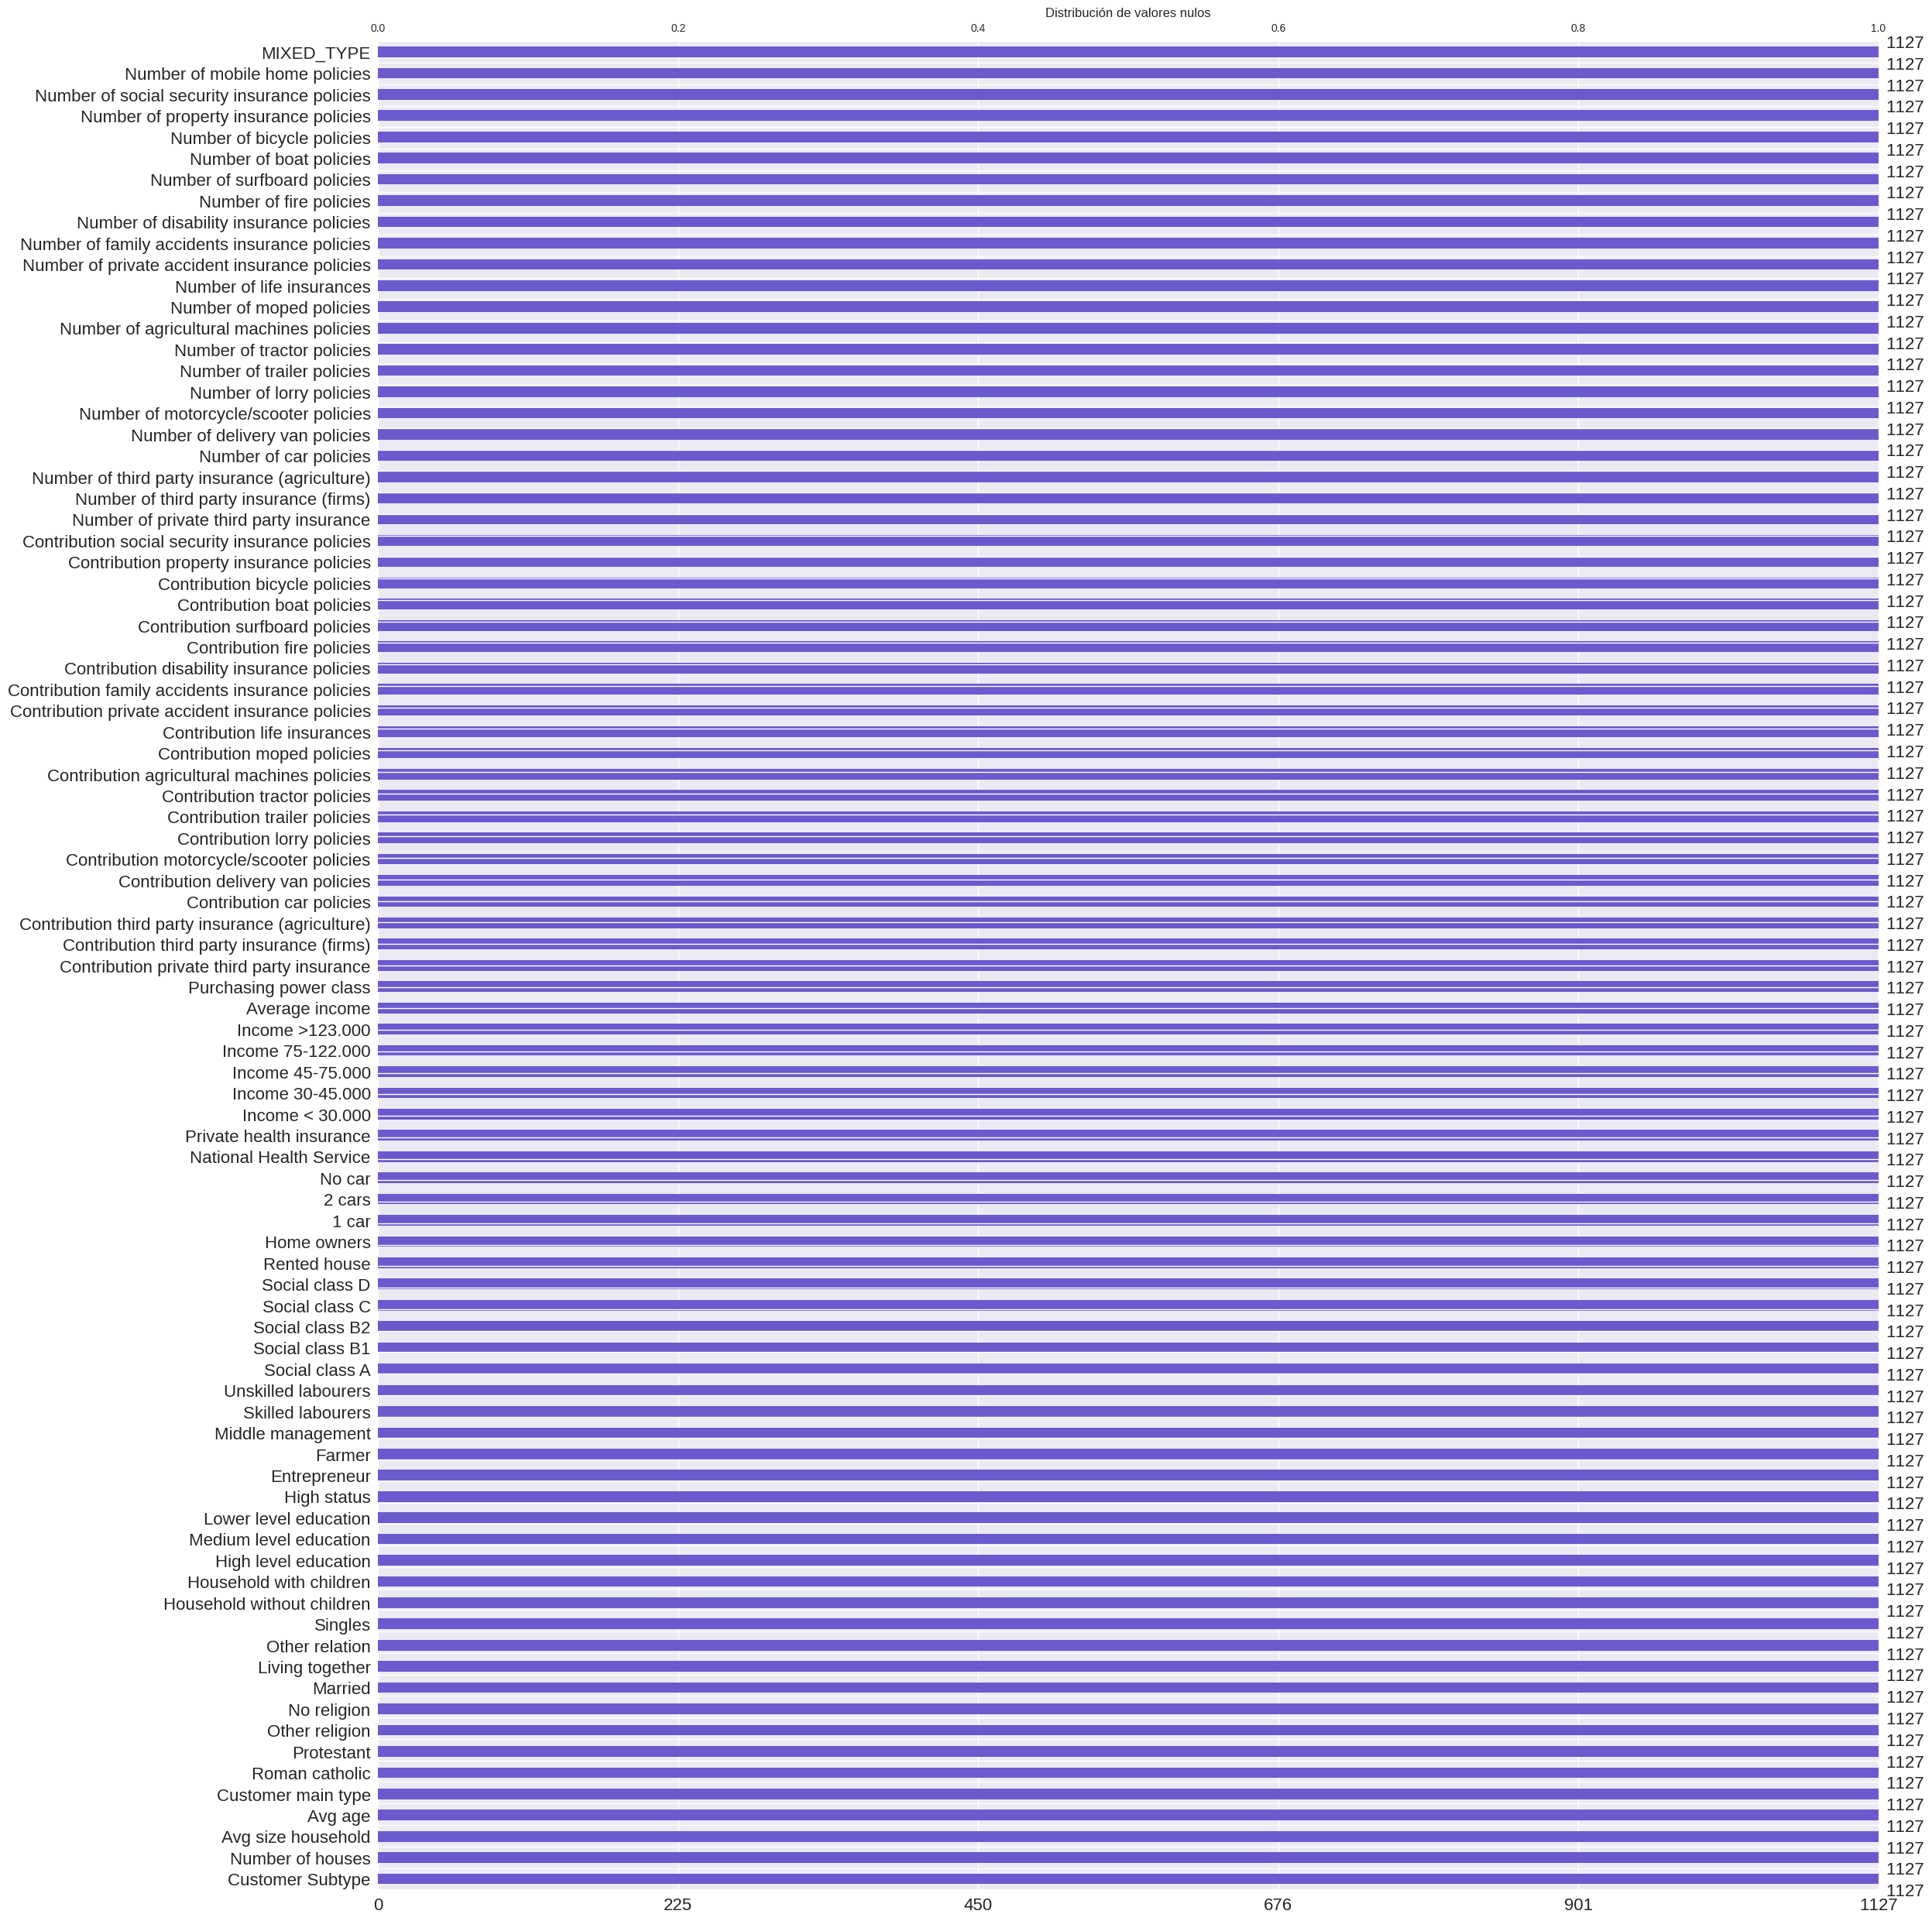

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies,MIXED_TYPE
1,Mixed small town dwellers,1.000,2.000,30-40 years,Family with grown ups,1%-10%,4.000,1.000,4.000,6.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,108.000
11,"Modern, complete families",1.000,3.000,40-50 years,Average Family,1%-10%,3.000,2.000,4.000,7.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,492.000
13,Mixed rurals,1.000,3.000,40-50 years,Farmers,0%,5.000,0.000,4.000,7.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,492.000


In [153]:

print(" Dataset cargado: df_copy")
print(f"Shape: {df_copy.shape}")
print("Tipos de datos:\n", df_copy.dtypes.value_counts())
print(f"Duplicados: {df_copy.duplicated().sum()}")

msno.bar(df_copy, color='slateblue')
plt.title('Distribución de valores nulos')
plt.show()

df_copy.head(3)

In [154]:
df_copy.to_csv("rename.csv")

df listo para EDA
Shape: 1127 filas x 87 columnas
Tipos (conteo):
float64    82
object      5
Name: count, dtype: int64
Duplicados: 2
Columnas con nulos: 0 de 87
Uso de memoria aprox.: 1.06 MB
Constantes: 39 -> ['Number of houses', 'Contribution lorry policies', 'Contribution trailer policies', 'Contribution tractor policies', 'Contribution agricultural machines policies', 'Contribution moped policies', 'Contribution life insurances', 'Contribution private accident insurance policies', 'Contribution family accidents insurance policies', 'Contribution disability insurance policies']...
Near-constantes (>=98% mismo valor): 0 -> []


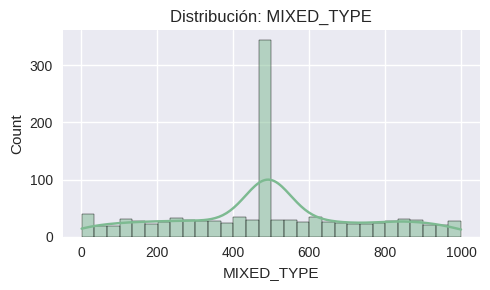

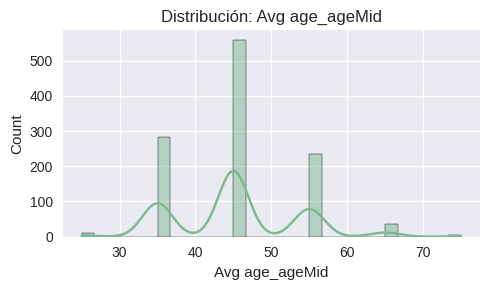

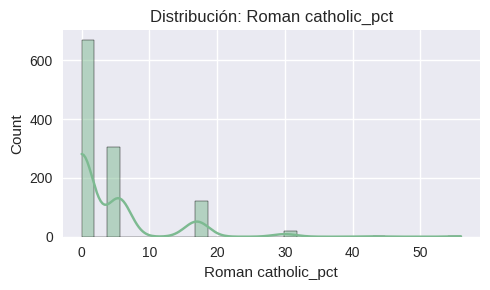

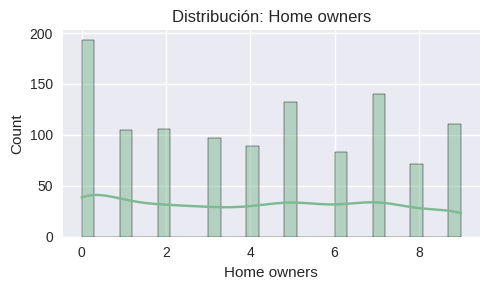

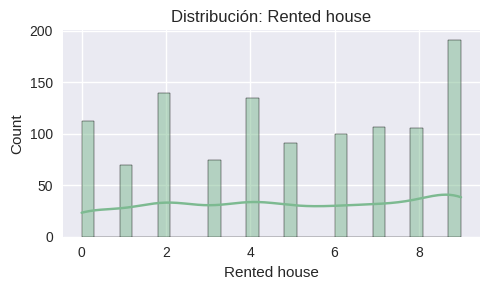

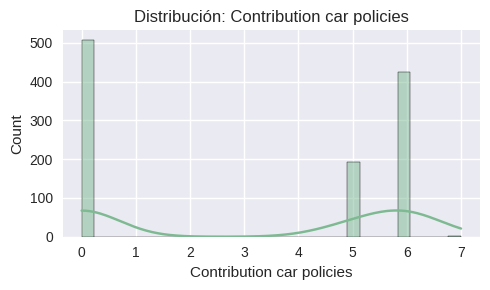

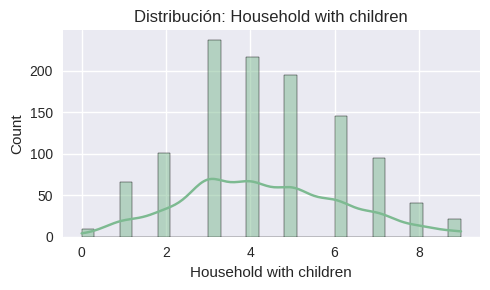

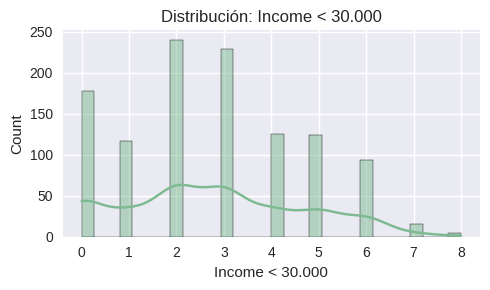

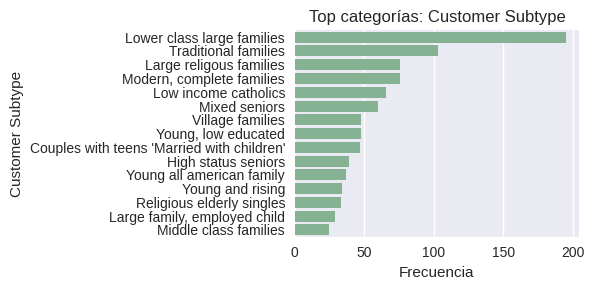

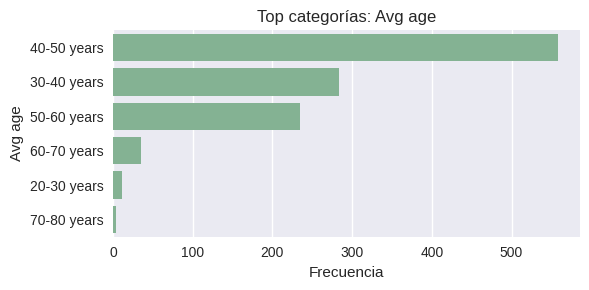

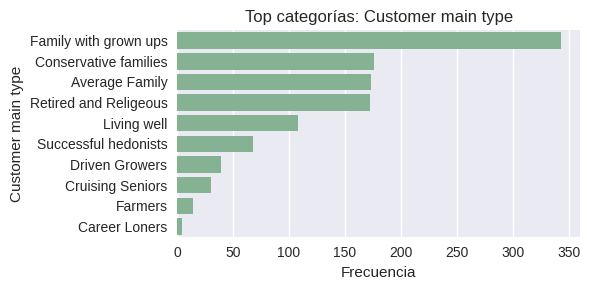

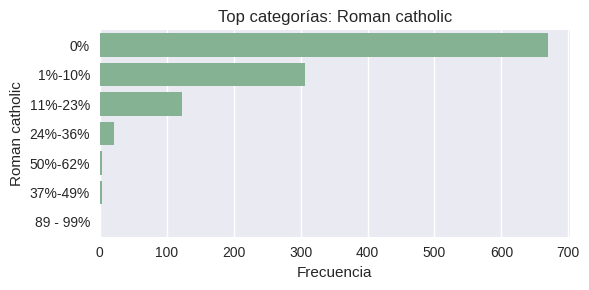

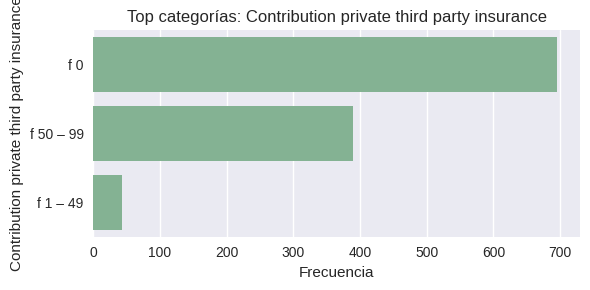

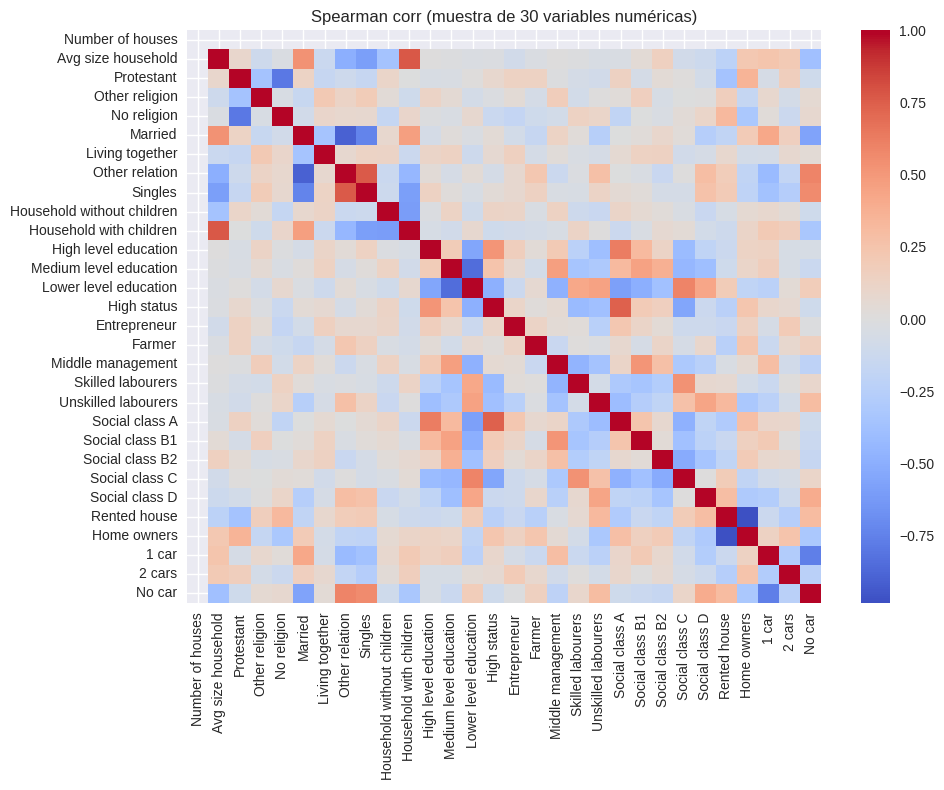

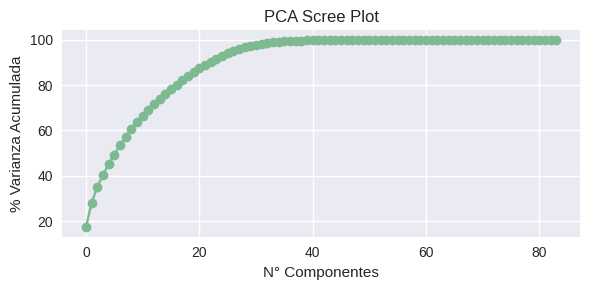

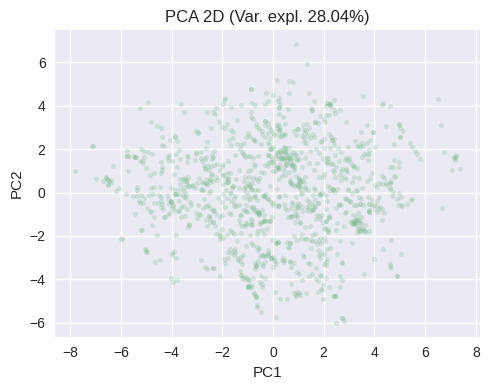

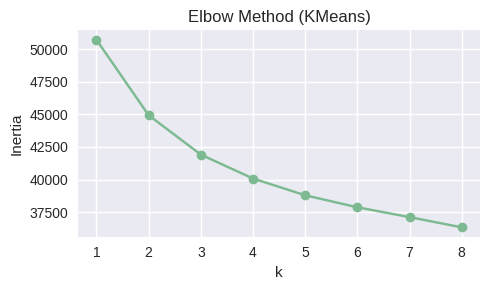

Archivos exportados en ./eda_outputs/:
- nulls_cardinality.csv
- highly_correlated_pairs.csv
- outliers_iqr_top.csv


In [155]:
import re
import os

# ---------- 0) Entrada de datos ----------
if 'df_copy' not in globals():
    CANDIDATES = ['/content/rename.csv', '/mnt/data/rename.csv']
    found = None
    for p in CANDIDATES:
        if os.path.exists(p):
            found = p
            break
    if found is None:
        raise FileNotFoundError("No encontré df_copy ni rename.csv. Carga el DataFrame antes de correr el EDA.")
    df_copy = pd.read_csv(found)

df = df_copy.copy()

# ---------- 1) Helpers de parsing (solo para EDA) ----------
def to_float_safe(x):
    """Convierte strings numéricos con comas/espacios a float si puede."""
    if pd.isna(x): return np.nan
    if isinstance(x, (int, float)): return float(x)
    s = str(x).strip()
    s = s.replace(",", ".")  # por si vienen comas decimales
    s = re.sub(r"\s+", "", s)
    try:
        return float(s)
    except:
        return np.nan

def parse_percent_or_range(s):
    """
    Convierte:
      - '0%' -> 0.0
      - '1%-10%' -> 5.5 (promedio)
      - '11%-23%' -> 17.0 (promedio)
      - '12.3%' -> 12.3
    Si no es porcentaje/rango, devuelve np.nan
    """
    if pd.isna(s): return np.nan
    s = str(s).strip()
    # Rango con %
    m = re.match(r"^\s*(\d+(?:\.\d+)?)%\s*-\s*(\d+(?:\.\d+)?)%\s*$", s)
    if m:
        a, b = float(m.group(1)), float(m.group(2))
        return (a + b) / 2.0
    # Único valor con %
    m = re.match(r"^\s*(\d+(?:\.\d+)?)%\s*$", s)
    if m:
        return float(m.group(1))
    return np.nan

def parse_age_range(s):
    """
    Convierte '30-40 years' -> 35.0 (punto medio)
            '40-50 years' -> 45.0
            '50-60 years' -> 55.0, etc.
    Si no matchea, np.nan.
    """
    if pd.isna(s): return np.nan
    s = str(s).lower().strip()
    m = re.match(r"^\s*(\d+)\s*-\s*(\d+)\s*years?\s*$", s)
    if m:
        a, b = int(m.group(1)), int(m.group(2))
        return (a + b) / 2.0
    return np.nan

def looks_like_percent_or_range(col):
    """Heurística: si >30% de los valores parecen % o rangos %, lo tratamos como porcentaje."""
    s = col.dropna().astype(str)
    if len(s) == 0: return False
    m = s.str.contains(r"%")
    return (m.mean() >= 0.3)

def looks_like_age_range(col):
    """Heurística: si >30% parecen 'x-y years'."""
    s = col.dropna().astype(str)
    if len(s) == 0: return False
    m = s.str.contains(r"\d+\s*-\s*\d+\s*years", case=False, regex=True)
    return (m.mean() >= 0.3)

def booleanize(col):
    """
    Intenta mapear cadenas tipo yes/no, true/false, y/n a boolean.
    Devuelve serie booleana o None si no aplica.
    """
    s = col.dropna().astype(str).str.strip().str.lower()
    uniq = set(s.unique())
    truthy = {"yes","true","y","1","si","sí"}
    falsy  = {"no","false","n","0"}
    if uniq.issubset(truthy.union(falsy)) and len(uniq) <= 4:
        return col.astype(str).str.strip().str.lower().map(lambda x: True if x in truthy else (False if x in falsy else np.nan))
    return None

# ---------- 2) Panorama general ----------
print("df listo para EDA")
print(f"Shape: {df.shape[0]} filas x {df.shape[1]} columnas")
print("Tipos (conteo):")
print(df.dtypes.value_counts())
print("Duplicados:", df.duplicated().sum())
null_counts = df.isna().sum()
print("Columnas con nulos:", int((null_counts > 0).sum()), "de", df.shape[1])

# Memoria aproximada:
mem_mb = df.memory_usage(deep=True).sum() / (1024**2)
print(f"Uso de memoria aprox.: {mem_mb:.2f} MB")

# ---------- 3) Detección de columnas y normalización “solo EDA” ----------
# Marcamos tipos base
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Intento de normalización en copia paralela (NO tocamos df original):
df_eda = df.copy()

# 3.1 Normalizamos porcentajes y rangos de % a número
for c in obj_cols:
    if looks_like_percent_or_range(df_eda[c]):
        parsed = df_eda[c].apply(parse_percent_or_range)
        # si convirtió una fracción significativa, usamos la columna numérica
        if parsed.notna().mean() >= 0.3:
            df_eda[c + "_pct"] = parsed  # nueva col numérica
# 3.2 Normalizamos rangos de edad a punto medio
for c in obj_cols:
    if looks_like_age_range(df_eda[c]):
        parsed = df_eda[c].apply(parse_age_range)
        if parsed.notna().mean() >= 0.3:
            df_eda[c + "_ageMid"] = parsed

# 3.3 Normalizamos booleanos
for c in obj_cols:
    b = booleanize(df_eda[c])
    if b is not None:
        df_eda[c + "_bool"] = b.astype('float')  # como 0/1 para análisis

# 3.4 Intento de numeric casting suelto (sin sobreescribir originales)
for c in obj_cols:
    coerced = df_eda[c].apply(to_float_safe)
    if coerced.notna().mean() >= 0.9:  # mayormente numérico
        df_eda[c + "_num"] = coerced

# Columnas numéricas para análisis
num_cols_eda = df_eda.select_dtypes(include=[np.number]).columns.tolist()

# ---------- 4) Cardinalidades y constantes ----------
card = df.nunique(dropna=False).sort_values(ascending=True)
const_cols = card[card<=1].index.tolist()
near_const = []
for c in df.columns:
    vc = df[c].value_counts(dropna=False, normalize=True)
    if not vc.empty and vc.iloc[0] >= 0.98 and df[c].nunique(dropna=False)>1:
        near_const.append(c)
print(f"Constantes: {len(const_cols)} -> {const_cols[:10]}{'...' if len(const_cols)>10 else ''}")
print(f"Near-constantes (>=98% mismo valor): {len(near_const)} -> {near_const[:10]}{'...' if len(near_const)>10 else ''}")

# ---------- 5) Resumen de nulos ----------
null_df = pd.DataFrame({
    "column": df.columns,
    "nulls": df.isna().sum().values,
    "%nulls": (df.isna().mean().values*100).round(2),
    "dtype": [str(t) for t in df.dtypes.values],
    "cardinality": [df[c].nunique(dropna=False) for c in df.columns]
}).sort_values("%nulls", ascending=False)
null_df.head(20)

# ---------- 6) Distribuciones univariadas ----------
# 6.1 Numéricas (top por varianza)
num_for_plots = [c for c in num_cols_eda if not c.endswith("_bool")]
variances = df_eda[num_for_plots].var().sort_values(ascending=False)
top_num = variances.head(min(8, len(variances))).index.tolist()

for c in top_num:
    plt.figure(figsize=(5,3))
    sns.histplot(df_eda[c].dropna(), bins=30, kde=True)
    plt.title(f"Distribución: {c}")
    plt.tight_layout()
    plt.show()

# 6.2 Categóricas (top por frecuencia)
cat_for_plots = df.select_dtypes(include=['object']).columns.tolist()
for c in cat_for_plots[:6]:
    vc = df[c].value_counts(dropna=False).head(15)
    plt.figure(figsize=(6,3))
    sns.barplot(x=vc.values, y=vc.index)
    plt.title(f"Top categorías: {c}")
    plt.xlabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# ---------- 7) Correlaciones ----------
# Usamos df_eda (con columnas auxiliares numéricas) para ampliar cobertura
num_all = df_eda.select_dtypes(include=[np.number]).columns
corr = df_eda[num_all].corr(method="spearman")

# Mapa resumido (si hay muchas columnas, muestreamos 30)
cols_for_heat = list(num_all[:30])
plt.figure(figsize=(10,8))
sns.heatmap(df_eda[cols_for_heat].corr(method="spearman"), cmap="coolwarm", center=0)
plt.title("Spearman corr (muestra de 30 variables numéricas)")
plt.tight_layout()
plt.show()

# Pares altamente correlacionados
high_pairs = []
thr = 0.9
corr_mat = corr.abs()
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
pairs = np.where(upper >= thr)
for i,j in zip(*pairs):
    high_pairs.append((upper.index[i], upper.columns[j], corr_mat.iloc[i,j]))
high_pairs_sorted = sorted(high_pairs, key=lambda x: -x[2])[:30]
pd.DataFrame(high_pairs_sorted, columns=["var1","var2","|rho|"]).head(30)

# ---------- 8) Outliers (IQR) ----------
def iqr_outlier_share(s: pd.Series):
    s = s.dropna()
    if s.empty: return np.nan
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((s<low) | (s>high)).mean()

out_rows = []
for c in num_for_plots:
    out_rows.append((c, round(iqr_outlier_share(df_eda[c])*100, 2)))
out_df = pd.DataFrame(out_rows, columns=["feature","%outliers"]).sort_values("%outliers", ascending=False)
out_df.head(15)

# ---------- 9) PCA (scree + proyección 2D) ----------
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

num_for_pca = df_eda.select_dtypes(include=[np.number]).columns
X = df_eda[num_for_pca].fillna(0).values
Xs = StandardScaler().fit_transform(X)
pca = PCA().fit(Xs)

# Scree plot
plt.figure(figsize=(6,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker="o")
plt.xlabel("N° Componentes")
plt.ylabel("% Varianza Acumulada")
plt.title("PCA Scree Plot")
plt.tight_layout()
plt.show()

# 2D plot
pca2 = PCA(n_components=2, random_state=42)
Xp = pca2.fit_transform(Xs)
plt.figure(figsize=(5,4))
plt.scatter(Xp[:,0], Xp[:,1], alpha=0.25, s=10)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"PCA 2D (Var. expl. {pca2.explained_variance_ratio_.sum()*100:.2f}%)")
plt.tight_layout()
plt.show()

# ---------- 10) KMeans (Elbow) ----------
from sklearn.cluster import KMeans

inertias = []
K = range(1, 9)
for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(Xs)
    inertias.append(km.inertia_)

plt.figure(figsize=(5,3))
plt.plot(K, inertias, marker="o")
plt.xticks(list(K))
plt.xlabel("k"); plt.ylabel("Inertia")
plt.title("Elbow Method (KMeans)")
plt.tight_layout()
plt.show()

# ---------- 11) Exports útiles ----------
os.makedirs("eda_outputs", exist_ok=True)
null_df.to_csv("eda_outputs/nulls_cardinality.csv", index=False)
pd.DataFrame(high_pairs_sorted, columns=["var1","var2","abs_corr"]).to_csv("eda_outputs/highly_correlated_pairs.csv", index=False)
out_df.to_csv("eda_outputs/outliers_iqr_top.csv", index=False)

print("Archivos exportados en ./eda_outputs/:")
print("- nulls_cardinality.csv")
print("- highly_correlated_pairs.csv")
print("- outliers_iqr_top.csv")


In [156]:
# =========================================
# Post-EDA builder: df_model (sin target)
# - Quita duplicados
# - Documenta y elimina near-constantes
# - Normaliza % y rangos "x-y years" a numérico (columnas auxiliares)
# - Imputa nulos (mediana/moda)
# - One-Hot en categóricas puras
# - (Opcional) quita colineales fuertes (rho>=0.90) y aplica VIF
# =========================================
import re, numpy as np, pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

df0 = df_copy.copy()

# 1) Duplicados
dupes = df0.duplicated().sum()
df1 = df0.drop_duplicates()
print(f"Duplicados eliminados: {dupes}")

# 2) Near-constantes (>=98% mismo valor; no tocar si son claves de negocio)
near_constant_cols = []
for c in df1.columns:
    vc = df1[c].value_counts(dropna=False, normalize=True)
    if not vc.empty and vc.iloc[0] >= 0.98 and df1[c].nunique(dropna=False) > 1:
        near_constant_cols.append(c)

print(f"Near-constantes detectadas: {len(near_constant_cols)}")
df2 = df1.drop(columns=near_constant_cols)

# 3) Normalizar porcentajes y rangos a numérico (columnas auxiliares)
def parse_percent_or_range(s):
    if pd.isna(s): return np.nan
    s = str(s).strip()
    m = re.match(r"^(\d+(?:\.\d+)?)%\s*-\s*(\d+(?:\.\d+)?)%$", s)
    if m: return (float(m.group(1)) + float(m.group(2))) / 2.0
    m = re.match(r"^(\d+(?:\.\d+)?)%$", s)
    if m: return float(m.group(1))
    return np.nan

def parse_age_range(s):
    if pd.isna(s): return np.nan
    s = str(s).lower().strip()
    m = re.match(r"^(\d+)\s*-\s*(\d+)\s*years?$", s)
    if m: return (int(m.group(1)) + int(m.group(2))) / 2.0
    return np.nan

df3 = df2.copy()
obj_cols = df3.select_dtypes(include='object').columns.tolist()

for c in obj_cols:
    s = df3[c].astype(str)
    if s.str.contains('%', regex=False, na=False).mean() >= 0.30:
        df3[c + "_pct"] = df3[c].apply(parse_percent_or_range)
    if s.str.contains(r"\d+\s*-\s*\d+\s*years", case=False, regex=True, na=False).mean() >= 0.30:
        df3[c + "_ageMid"] = df3[c].apply(parse_age_range)

# Re-detectar tipos tras expansiones
num_cols = df3.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df3.select_dtypes(include=['object']).columns.tolist()

# 4) Imputación simple
num_imp = SimpleImputer(strategy='median')
cat_imp = SimpleImputer(strategy='most_frequent')
X_num = pd.DataFrame(num_imp.fit_transform(df3[num_cols]), columns=num_cols, index=df3.index)
X_cat = pd.DataFrame(cat_imp.fit_transform(df3[cat_cols]), columns=cat_cols, index=df3.index)

# 5) One-Hot para categóricas puras
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(cat_cols), index=df3.index)

# 6) (Opcional) Escalado robusto
scaler = RobustScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=num_cols, index=df3.index)

# 7) Concatenar
df_model = pd.concat([X_num_scaled, X_cat_ohe], axis=1)
print("df_model listo:", df_model.shape)

# 8) (Opcional) Quitar colineales muy fuertes (rho>=0.90)
corr = df_model.corr(method='spearman').abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_cols = {col for col in upper.columns if any(upper[col] >= 0.90)}
print(f"Cols removidas por alta colinealidad (rho>=0.90): {len(high_corr_cols)}")
df_model = df_model.drop(columns=list(high_corr_cols))

# 9) (Opcional) Persistir artefactos
df_model.to_csv("df_model_nosup.csv", index=False)
pd.Series(near_constant_cols, name="near_constant_cols").to_csv("near_constant_cols.csv", index=False)
pd.Series(sorted(high_corr_cols), name="high_corr_removed").to_csv("high_corr_removed.csv", index=False)

Duplicados eliminados: 2
Near-constantes detectadas: 0
df_model listo: (1125, 146)
Cols removidas por alta colinealidad (rho>=0.90): 8


In [157]:
df_copy = df_copy.drop(columns=['MIXED_TYPE'])

In [158]:
df_copy.to_csv('archivo.csv', index=False)

Limpieza y ajuste de la data para la pre-procesamiento para el modelo de ML

In [159]:
"""
Entradas/Salidas (mismo directorio del notebook):
  Entrada  : 'insurance_company_modified.csv'  (sin encabezados)
  Salida   : 'insurance_company_cleaned_modified.csv'
"""

from pathlib import Path
import pandas as pd
import numpy as np

# =========================
# Parámetros configurables
# =========================
RARE_THRESHOLD = 0.01   # 1%: valores fuera de rango raros -> NaN + imputar; si >1% -> clip al rango
AUTO_SHIFT_MAX = 0      # 0 = desactivado; si >0, prueba shifts circulares 1..K y elige el mejor

IN_MOD  = "insurance_company_modified.csv"
OUT_MOD = "insurance_company_cleaned_modified.csv"

# Lista canónica (85 features + target)
COLS = [
"MOSTYPE","MAANTHUI","MGEMOMV","MGEMLEEF","MOSHOOFD","MGODRK","MGODPR","MGODOV","MGODGE",
"MRELGE","MRELSA","MRELOV","MFALLEEN","MFGEKIND","MFWEKIND","MOPLHOOG","MOPLMIDD","MOPLLAAG",
"MBERHOOG","MBERZELF","MBERBOER","MBERMIDD","MBERARBG","MBERARBO","MSKA","MSKB1","MSKB2","MSKC",
"MSKD","MHHUUR","MHKOOP","MAUT1","MAUT2","MAUT0","MZFONDS","MZPART","MINKM30","MINK3045","MINK4575",
"MINK7512","MINK123M","MINKGEM","MKOOPKLA","PWAPART","PWABEDR","PWALAND","PPERSAUT","PBESAUT","PMOTSCO",
"PVRAAUT","PAANHANG","PTRACTOR","PWERKT","PBROM","PLEVEN","PPERSONG","PGEZONG","PWAOREG","PBRAND",
"PZEILPL","PPLEZIER","PFIETS","PINBOED","PBYSTAND","AWAPART","AWABEDR","AWALAND","APERSAUT","ABESAUT",
"AMOTSCO","AVRAAUT","AAANHANG","ATRACTOR","AWERKT","ABROM","ALEVEN","APERSONG","AGEZONG","AWAOREG",
"ABRAND","AZEILPL","APLEZIER","AFIETS","AINBOED","ABYSTAND","CARAVAN"
]

# Rangos esperados (derivados del diccionario)
def build_expected():
    expected = {
        "MOSTYPE": (1,41),
        "MAANTHUI": (1,10),
        "MGEMOMV": (1,6),
        "MGEMLEEF": (1,6),
        "MOSHOOFD": (1,10),
        "CARAVAN": (0,1),
    }
    fields_0_9 = [
        "MGODRK","MGODPR","MGODOV","MGODGE","MRELGE","MRELSA","MRELOV","MFALLEEN","MFGEKIND","MFWEKIND",
        "MOPLHOOG","MOPLMIDD","MOPLLAAG","MBERHOOG","MBERZELF","MBERBOER","MBERMIDD","MBERARBG","MBERARBO",
        "MSKA","MSKB1","MSKB2","MSKC","MSKD","MHHUUR","MHKOOP","MAUT1","MAUT2","MAUT0","MZFONDS","MZPART",
        "MINKM30","MINK3045","MINK4575","MINK7512","MINK123M","MINKGEM","MKOOPKLA",
        "PWAPART","PWABEDR","PWALAND","PPERSAUT","PBESAUT","PMOTSCO","PVRAAUT","PAANHANG","PTRACTOR","PWERKT",
        "PBROM","PLEVEN","PPERSONG","PGEZONG","PWAOREG","PBRAND","PZEILPL","PPLEZIER","PFIETS","PINBOED","PBYSTAND",
    ]
    for f in fields_0_9:
        expected[f] = (0,9)
    a_fields = [
        "AWAPART","AWABEDR","AWALAND","APERSAUT","ABESAUT","AMOTSCO","AVRAAUT","AAANHANG",
        "ATRACTOR","AWERKT","ABROM","ALEVEN","APERSONG","AGEZONG","AWAOREG","ABRAND","AZEILPL",
        "APLEZIER","AFIETS","AINBOED","ABYSTAND"
    ]
    for a in a_fields:
        expected[a] = (1,12)
    return expected

EXPECTED = build_expected()

# =============
# Core helpers
# =============

def load_modified(path):
    p = Path(path)
    if not p.exists():
        raise FileNotFoundError(f"No se encontró '{path}' en el directorio de trabajo.")
    df = pd.read_csv(p, header=None, dtype=str)
    # Mantener solo 86 columnas (85 features + target)
    if df.shape[1] > len(COLS):
        df = df.iloc[:, :len(COLS)]
    if df.shape[1] < len(COLS):
        for c in range(df.shape[1], len(COLS)):
            df[c] = np.nan
    df.columns = COLS
    # Forzar a numérico (no numérico -> NaN)
    df = df.apply(lambda s: pd.to_numeric(s.str.strip(), errors='coerce') if s.dtype == object else pd.to_numeric(s, errors='coerce'))
    return df


def inrange_score(df):
    total = 0
    ok = 0
    for c,(lo,hi) in EXPECTED.items():
        if c not in df.columns: continue
        s = df[c]; m = s.notna()
        total += int(m.sum())
        ok += int(((s>=lo)&(s<=hi)&m).sum())
    return ok / max(1,total)


def try_auto_shift(df, max_shift):
    if max_shift <= 0:
        return df, 0, None
    feat = [c for c in COLS if c != 'CARAVAN']
    base = df[feat].copy()
    best_df = df
    best_score = inrange_score(df)
    best_s = 0
    for s in range(1, max_shift+1):
        rolled = base.copy().iloc[:, -s:].join(base.iloc[:, :-s])
        rolled.columns = feat
        candidate = rolled.join(df[['CARAVAN']])
        score = inrange_score(candidate)
        if score > best_score:
            best_score, best_s, best_df = score, s, candidate
    return best_df, best_s, best_score


def analyze_and_repair(df, rare_threshold=0.01, verbose=True):
    report = {}
    out = df.copy()
    n = len(out)
    for col,(lo,hi) in EXPECTED.items():
        if col not in out.columns: continue
        s = out[col]
        mask_out = (~s.isna()) & ((s < lo) | (s > hi))
        cnt = int(mask_out.sum()); pct = cnt / n if n>0 else 0
        report[col] = {"min": lo, "max": hi, "bad_count": cnt, "bad_pct": float(pct)}
        if verbose and cnt>0:
            print(f"{col}: {cnt} ({pct:.2%}) fuera de rango [{lo},{hi}]")
        if cnt == 0: continue
        if pct <= rare_threshold:
            out.loc[mask_out, col] = np.nan
            if verbose: print("  -> rare -> set NaN (imputar)")
        else:
            out[col] = s.clip(lo, hi)
            if verbose: print("  -> widespread -> clip")
    return out, report


def finalize_and_save(df_repaired, out_path):
    df = df_repaired.copy()
    # Redondear a entero manteniendo NaN
    for c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
        df[c] = df[c].round().where(~df[c].isna(), np.nan)

    policy = [c for c,v in EXPECTED.items() if v==(1,12)]
    binary = [c for c,v in EXPECTED.items() if v==(0,1)]
    catsm = [c for c in EXPECTED if c not in policy and c not in binary and EXPECTED[c][1] <= 9]

    # Imputaciones
    for c in catsm:
        if c in df.columns:
            mode_val = df[c].mode(dropna=True)
            fill = int(mode_val.iloc[0]) if len(mode_val)>0 else int(EXPECTED[c][0])
            df[c] = df[c].fillna(fill).astype(int)
    for c in policy:
        if c in df.columns:
            med = df[c].median(skipna=True)
            med = EXPECTED[c][0] if np.isnan(med) else med
            df[c] = df[c].fillna(int(round(med))).astype(int)
    for c in binary:
        if c in df.columns:
            mode_val = df[c].mode(dropna=True)
            fill = int(mode_val.iloc[0]) if len(mode_val)>0 else EXPECTED[c][0]
            df[c] = df[c].fillna(fill).astype(int)

    # Resto: mediana
    for c in df.columns:
        if df[c].isna().any():
            med = df[c].median(skipna=True)
            df[c] = df[c].fillna(int(round(med)) if not np.isnan(med) else 0)

    # Cast final a int
    for c in df.columns:
        df[c] = df[c].astype(int)

    df.to_csv(out_path, index=False)
    return df

# =====
# main
# =====

def main():
    print("--- Limpieza SOLO modificado (v3) ---")
    df = load_modified(IN_MOD)
    print(f"Cargado: {df.shape}")

    # Heurística de shift (opcional)
    if AUTO_SHIFT_MAX and AUTO_SHIFT_MAX > 0:
        print(f"Probando auto-shift hasta {AUTO_SHIFT_MAX} columnas...")
        shifted, s, score = try_auto_shift(df, AUTO_SHIFT_MAX)
        if s != 0:
            print(f"Shift seleccionado: +{s} (derecha) con in-range score={score:.4f}")
            df = shifted
        else:
            print("No se detectó mejora con shifts (s=0).")

    print("\n--- Analizar y reparar ---")
    repaired, report = analyze_and_repair(df, RARE_THRESHOLD, verbose=True)

    print("\n--- Imputar y guardar ---")
    cleaned = finalize_and_save(repaired, OUT_MOD)
    print(f"Guardado -> {OUT_MOD}")

    # Resumen rápido
    def quick(col):
        if col in df.columns:
            print(f"\n{col}")
            print("Antes:")
            print(df[col].value_counts(dropna=False).head(8))
            print("Después:")
            print(cleaned[col].value_counts(dropna=False).head(8))
    for c in ["MOSTYPE","MAANTHUI","AWAPART","PWAPART","CARAVAN"]:
        quick(c)

if __name__ == "__main__":
    main()


--- Limpieza SOLO modificado (v3) ---
Cargado: (5938, 86)

--- Analizar y reparar ---
MOSTYPE: 75 (1.26%) fuera de rango [1,41]
  -> widespread -> clip
MAANTHUI: 69 (1.16%) fuera de rango [1,10]
  -> widespread -> clip
MGEMOMV: 64 (1.08%) fuera de rango [1,6]
  -> widespread -> clip
MGEMLEEF: 73 (1.23%) fuera de rango [1,6]
  -> widespread -> clip
MOSHOOFD: 58 (0.98%) fuera de rango [1,10]
  -> rare -> set NaN (imputar)
CARAVAN: 22 (0.37%) fuera de rango [0,1]
  -> rare -> set NaN (imputar)
MGODRK: 31 (0.52%) fuera de rango [0,9]
  -> rare -> set NaN (imputar)
MGODPR: 56 (0.94%) fuera de rango [0,9]
  -> rare -> set NaN (imputar)
MGODOV: 51 (0.86%) fuera de rango [0,9]
  -> rare -> set NaN (imputar)
MGODGE: 40 (0.67%) fuera de rango [0,9]
  -> rare -> set NaN (imputar)
MRELGE: 67 (1.13%) fuera de rango [0,9]
  -> widespread -> clip
MRELSA: 49 (0.83%) fuera de rango [0,9]
  -> rare -> set NaN (imputar)
MRELOV: 51 (0.86%) fuera de rango [0,9]
  -> rare -> set NaN (imputar)
MFALLEEN: 49 (

In [160]:
# 1) Carga csv limpio (con encabezado)
df_copy = pd.read_csv('insurance_company_cleaned_modified.csv')

In [161]:
df_copy.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,1,1,1,1,1,1,1,1,1,0
1,37,1,2,2,8,1,4,0,4,6,...,1,1,1,1,1,1,1,1,1,0
2,37,1,2,2,8,0,4,2,4,3,...,1,1,1,1,1,1,1,1,1,0
3,9,1,3,3,3,2,3,2,4,5,...,1,1,1,1,1,1,1,1,1,0
4,40,1,4,2,10,1,4,1,4,7,...,1,1,1,1,1,1,1,1,1,0


## Construcción, ajuste y evaluación de Modelos de Machine Learning

En esta sección se entrenan y evalúan los modelos (Logistic Regression y XGBoost).Incluye pipelines con preprocesamiento, búsqueda de hiperparámetros (RandomizedSearchCV),evaluación por validación cruzada y evaluación final.

### Librerias a utilizar

In [162]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import TargetEncoder, OneHotEncoder, StandardScaler, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    average_precision_score, roc_auc_score, f1_score, recall_score, confusion_matrix
)
from sklearn.compose import make_column_selector
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

### Tratamiento de datos


Después de la exploración de datos, podemos observar que hay 3 tipos de datos en el dataset:

* Categoricas nominales (2 variables)
* Numéricas ordinales (62 variables)
* Numericas discretas (21 variables)

In [163]:
# ------------------------------------------------------------------
# 1) Asignar nombres "cortos" originales en orden estándar (1..86)
#    y nombres descriptivos para mayor legibilidad.
#    El orden es el de TICDATA/COIL2000 (85 features + target).
# ------------------------------------------------------------------

short_names = [
    # 1..43: sociodemográfico (zip code derived)
    "MOSTYPE","MAANTHUI","MGEMOMV","MGEMLEEF","MOSHOOFD","MGODRK","MGODPR","MGODOV","MGODGE",
    "MRELGE","MRELSA","MRELOV","MFALLEEN","MFGEKIND","MFWEKIND","MOPLHOOG","MOPLMIDD","MOPLLAAG",
    "MBERHOOG","MBERZELF","MBERBOER","MBERMIDD","MBERARBG","MBERARBO","MSKA","MSKB1","MSKB2","MSKC",
    "MSKD","MHHUUR","MHKOOP","MAUT1","MAUT2","MAUT0","MZFONDS","MZPART","MINKM30","MINK3045",
    "MINK4575","MINK7512","MINK123M","MINKGEM","MKOOPKLA",
    # 44..64: P* contribuciones (rangos monetarios)
    "PWAPART","PWABEDR","PWALAND","PPERSAUT","PBESAUT","PMOTSCO","PVRAAUT","PAANHANG","PTRACTOR",
    "PWERKT","PBROM","PLEVEN","PPERSONG","PGEZONG","PWAOREG","PBRAND","PZEILPL","PPLEZIER","PFIETS",
    "PINBOED","PBYSTAND",
    # 65..85: A* conteos de pólizas
    "AWAPART","AWABEDR","AWALAND","APERSAUT","ABESAUT","AMOTSCO","AVRAAUT","AAANHANG","ATRACTOR",
    "AWERKT","ABROM","ALEVEN","APERSONG","AGEZONG","AWAOREG","ABRAND","AZEILPL","APLEZIER","AFIETS",
    "AINBOED","ABYSTAND",
    # 86: target
    "CARAVAN"
]

# Nombres descriptivos (alineados 1 a 1 con short_names)
long_names = [
    # 1..43
    "customer_subtype","num_houses","avg_household_size","avg_age_band","customer_main_type",
    "pct_roman_catholic","pct_protestant","pct_other_religion","pct_no_religion",
    "pct_married","pct_living_together","pct_other_relation","pct_singles","pct_household_no_kids",
    "pct_household_with_kids","pct_high_education","pct_medium_education","pct_low_education",
    "pct_high_status","pct_entrepreneur","pct_farmer","pct_middle_management","pct_skilled_labour",
    "pct_unskilled_labour","pct_social_class_a","pct_social_class_b1","pct_social_class_b2",
    "pct_social_class_c","pct_social_class_d","pct_rented_house","pct_home_owner","pct_one_car",
    "pct_two_cars","pct_no_car","pct_national_health_service","pct_private_health_insurance",
    "pct_income_lt_30k","pct_income_30k_45k","pct_income_45k_75k","pct_income_75k_122k",
    "pct_income_gt_123k","pct_avg_income","purchasing_power_class",
    # 44..64 (rangos monetarios, ordinales)
    "contr_private_third_party","contr_third_party_firms","contr_third_party_agriculture",
    "contr_car_policies","contr_delivery_van_policies","contr_motorcycle_policies","contr_lorry_policies",
    "contr_trailer_policies","contr_tractor_policies","contr_agri_machine_policies","contr_moped_policies",
    "contr_life_ins","contr_private_accident","contr_family_accident","contr_disability_ins",
    "contr_fire_policies","contr_surfboard_policies","contr_boat_policies","contr_bicycle_policies",
    "contr_property_ins","contr_social_security",
    # 65..85 (conteos)
    "num_private_third_party","num_third_party_firms","num_third_party_agriculture","num_car_policies",
    "num_delivery_van_policies","num_motorcycle_policies","num_lorry_policies","num_trailer_policies",
    "num_tractor_policies","num_agri_machine_policies","num_moped_policies","num_life_ins",
    "num_private_accident","num_family_accident","num_disability_ins","num_fire_policies",
    "num_surfboard_policies","num_boat_policies","num_bicycle_policies","num_property_ins",
    "num_social_security",
    # target
    "target_caravan"
]

# Validación rápida del DataFrame de entrada:
assert df_copy.shape[1] == 86, "Se esperaban 86 columnas (85 features + target)."
df_copy = df_copy.copy()
df_copy.columns = long_names  # asigna nombres descriptivos

# ------------------------------------------------------------------
# 2) Definir listas de columnas por tipo semántico
#    - Nominales: códigos sin orden (tipologías)
#    - Ordinales: rangos crecientes (0..9 o bandas ascendentes)
#    - Numéricas discretas: conteos/magnitudes
# ------------------------------------------------------------------

nominal_cols = [
    "customer_subtype",      # MOSTYPE
    "customer_main_type"     # MOSHOOFD
]

# M* (porcentajes/bandas) + MGEMLEEF (edad por bandas) + contribuciones P* (rangos monetarios)
ordinal_cols = [
    # M* (excepto MAANTHUI, MGEMOMV, que son numéricas)
    "avg_age_band","pct_roman_catholic","pct_protestant","pct_other_religion","pct_no_religion",
    "pct_married","pct_living_together","pct_other_relation","pct_singles","pct_household_no_kids",
    "pct_household_with_kids","pct_high_education","pct_medium_education","pct_low_education",
    "pct_high_status","pct_entrepreneur","pct_farmer","pct_middle_management","pct_skilled_labour",
    "pct_unskilled_labour","pct_social_class_a","pct_social_class_b1","pct_social_class_b2",
    "pct_social_class_c","pct_social_class_d","pct_rented_house","pct_home_owner","pct_one_car",
    "pct_two_cars","pct_no_car","pct_national_health_service","pct_private_health_insurance",
    "pct_income_lt_30k","pct_income_30k_45k","pct_income_45k_75k","pct_income_75k_122k",
    "pct_income_gt_123k","pct_avg_income","purchasing_power_class",
    # P* (rangos monetarios)
    "contr_private_third_party","contr_third_party_firms","contr_third_party_agriculture",
    "contr_car_policies","contr_delivery_van_policies","contr_motorcycle_policies","contr_lorry_policies",
    "contr_trailer_policies","contr_tractor_policies","contr_agri_machine_policies","contr_moped_policies",
    "contr_life_ins","contr_private_accident","contr_family_accident","contr_disability_ins",
    "contr_fire_policies","contr_surfboard_policies","contr_boat_policies","contr_bicycle_policies",
    "contr_property_ins","contr_social_security"
]

# Numéricas discretas (conteos): MAANTHUI, MGEMOMV y todas las A* (incl. ABYSTAND al final)
numeric_discrete_cols = [
    "num_houses","avg_household_size",
    "num_private_third_party","num_third_party_firms","num_third_party_agriculture","num_car_policies",
    "num_delivery_van_policies","num_motorcycle_policies","num_lorry_policies","num_trailer_policies",
    "num_tractor_policies","num_agri_machine_policies","num_moped_policies","num_life_ins",
    "num_private_accident","num_family_accident","num_disability_ins","num_fire_policies",
    "num_surfboard_policies","num_boat_policies","num_bicycle_policies","num_property_ins",
    "num_social_security"
]

### Feature Engineering y Modelado

En EDA observamos que el dataset tiene colinealidad alta entre algunos grupos de variables. En particular, las variables que empiezan con “P” (indicadores de porcentaje o contribución de un tipo de póliza en la zona) tienen cada una su análoga con “A” (número absoluto de pólizas de ese tipo en la zona), y aparecen fuertemente correlacionadas (se ven bandas rojizas diagonales en la matriz de correlación). Esto confirma que cada pareja P/A está representando la misma información en escalas distintas, por ejemplo, PBRAND es el porcentaje categorizado de pólizas de seguro de incendios en el área, mientras ABRAND es el número de tales pólizas en esa zona. Mantener ambas en el modelo aporta redundancia y puede introducir ruido o sobreajuste.

Una estrategia común es eliminar uno de cada par P/A, conservando solo las variables de porcentaje o las de conteo absoluto.



In [164]:
# ------------------------------------------------------------------
# 3) Eliminar variables numéricas altamente correlacionadas
#    - Umbral: se define un límite absoluto de correlación (thr=0.95)
#    - Estrategia: se elimina la más redundante según suma de correlaciones
#    - Excluye: la variable objetivo no se considera en el análisis
#    - Salida: DataFrame depurado, lista de columnas eliminadas, resumen
# ------------------------------------------------------------------

def prune_by_correlation(df_copy, target_col="target_caravan", thr=0.95, strategy="sum", random_state=42, verbose=True):
    """
    Remove redundant features by absolute correlation threshold.
    - df: DataFrame
    - target_col: name of target to exclude from correlation
    - thr: absolute correlation threshold above which we consider two features redundant
    - strategy: how to decide which one to drop in a high-correlation pair
        * "sum": drop the one with larger total correlation to others (more redundant globally)
        * "random": drop one at random (reproducible via random_state)
    Returns: pruned_df, dropped_columns, stats_dict
    """
    rng = np.random.RandomState(random_state)

    feat_cols = [c for c in df_copy.columns if c != target_col and pd.api.types.is_numeric_dtype(df_copy[c])]
    if len(feat_cols) < 2:
        return df_copy.copy(), [], {"reason": "not_enough_numeric", "n_features_original": len(feat_cols)}

    corr = df_copy[feat_cols].corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    to_drop = set()
    kept = set(feat_cols)

    # Greedy elimination
    for col in upper.columns:
        # candidates highly correlated with col
        high_pairs = upper[col][upper[col] > thr].dropna()
        for row, val in high_pairs.items():
            if row in kept and col in kept:
                if strategy == "sum":
                    s_row = corr[row].sum()
                    s_col = corr[col].sum()
                    drop = row if s_row >= s_col else col
                else:  # random
                    drop = rng.choice([row, col])
                kept.discard(drop)
                to_drop.add(drop)

    pruned_df = df_copy.drop(columns=list(to_drop), errors="ignore")
    stats = {
        "n_features_original": len(feat_cols),
        "threshold": thr,
        "n_dropped": len(to_drop),
        "n_features_after_pruning": len(feat_cols) - len(to_drop)
    }
    if verbose:
        print("Pruning stats:", stats)
    return pruned_df, sorted(list(to_drop)), stats

# Run pruning
df_pruned, dropped_cols, stats_corr = prune_by_correlation(df_copy, target_col="CARAVAN", thr=0.95, strategy="sum", verbose=True)
print("Dropped (sample):", dropped_cols[:20])
print("Original shape:", df_copy.shape, "-> Pruned shape:", df_pruned.shape)


Pruning stats: {'n_features_original': 86, 'threshold': 0.95, 'n_dropped': 1, 'n_features_after_pruning': 85}
Dropped (sample): ['customer_subtype']
Original shape: (5938, 86) -> Pruned shape: (5938, 85)


Ahora bien, procedemos a definir los transformadores de acuerdo al tipo de variable correspondiente.

In [165]:
# ------------------------------------------------------------------
# 4) Definir transformadores por tipo
#    - Nominales -> OneHotEncoder
#    - Ordinales -> mantener como enteros ordenados + StandardScaler
#    - Numéricas discretas -> log1p (opcional) + RobustScaler (resistente a colas/outliers)
# ------------------------------------------------------------------

te = OneHotEncoder(handle_unknown="ignore", sparse_output=False) # codificamos las variables categóricas nominales.

ordinal_transformer = StandardScaler()  # ya están codificadas 0..9 o en bandas crecientes por lo que solo estandarizaremos.

numeric_discrete_transformer = Pipeline(steps=[
    ("log1p", FunctionTransformer(np.log1p, validate=False)),  # estabiliza sesgos si hay muchos ceros/colas
    ("scaler", RobustScaler())
])

# ------------------------------------------------------------------
# 5) Definir ColumnTransformer
# ------------------------------------------------------------------

preprocessor = ColumnTransformer(
    transformers=[
        ("nom", te, nominal_cols),
        ("ord", ordinal_transformer, ordinal_cols),
        ("num", numeric_discrete_transformer, numeric_discrete_cols),
    ],
    remainder="drop"
)

Se implementan funciones personalizadas para métricas especialmente útiles en problemas de clasificación binaria con clases desbalanceadas, como ocurre en nuestro caso.

In [166]:
# ------------------------------------------------------------
# 6) Métricas y selección de umbral por G-Mean en VALID
# ------------------------------------------------------------
def specificity_score(y_true, y_pred):
    # TN / (TN + FP)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0.0

def gmean_at_threshold(y_true, y_proba, thr):
    y_hat = (y_proba >= thr).astype(int)
    rec = recall_score(y_true, y_hat)             # Sensitivity
    spc = specificity_score(y_true, y_hat)        # Specificity
    return np.sqrt(rec * spc), rec, spc

Se realiza la partición de datos en los diferentes conjuntos (entrenamiento, validación y prueba)

In [167]:
# ------------------------------------------------------------
# 7) Partición: Train / Valid / Test (estratificada)
#    - Train: 60% del total
#    - Test: 20% del total
#    - Valid: 20% del total
# ------------------------------------------------------------

# Separar variables dependientes e independiente
y = df_copy["target_caravan"].astype(int)
X = df_copy.drop(columns=["target_caravan"])

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42
)

Se plantea un modelo de regresión logística que sirve como base o de punto de partida

In [168]:
# ------------------------------------------------------------
# 8) Pipeline final con Regresión Logística
#    - class_weight='balanced' para desbalance
# ------------------------------------------------------------
clf = LogisticRegression(
    max_iter=2000,
    class_weight="balanced", # dataset muy desbalanceado
    solver="lbfgs",
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", clf)
])

# Entrenar
pipe.fit(X_train, y_train)

# Probabilidades en valid y test
p_valid = pipe.predict_proba(X_valid)[:, 1]
p_test  = pipe.predict_proba(X_test)[:, 1]

# Métricas umbral-independientes en VALID
ap_valid  = average_precision_score(y_valid, p_valid)
roc_valid = roc_auc_score(y_valid, p_valid)

# Buscar umbral óptimo por G-Mean
thresholds = np.linspace(0.01, 0.99, 99)
gmeans, recs, spcs = [], [], []
for t in thresholds:
    g, r, s = gmean_at_threshold(y_valid, p_valid, t)
    gmeans.append(g); recs.append(r); spcs.append(s)

best_idx = int(np.argmax(gmeans))
best_thr = float(thresholds[best_idx])
best_gmean_valid = float(gmeans[best_idx])

# ------------------------------------------------------------
# 9) Evaluación
# ------------------------------------------------------------
ap_test  = average_precision_score(y_test, p_test)
roc_test = roc_auc_score(y_test, p_test)

yhat_test = (p_test >= best_thr).astype(int)
gmean_test, rec_test, spc_test = gmean_at_threshold(y_test, p_test, best_thr)

yhat_valid = (p_valid >= best_thr).astype(int)
f1_valid = f1_score(y_valid, yhat_valid)
f1_test  = f1_score(y_test, yhat_test)

print("=== VALIDACIÓN (para selección de umbral) ===")
print(f"Average Precision (PR-AUC): {ap_valid:0.4f}")
print(f"ROC-AUC:                   {roc_valid:0.4f}")
print(f"Best threshold (G-Mean):   {best_thr:0.3f}")
print(f"G-Mean @best_thr:          {best_gmean_valid:0.4f}")
print(f"F1-score @best_thr:        {f1_valid:0.4f}")

print("\n=== PRUEBA (umbral fijado en valid) ===")
print(f"Average Precision (PR-AUC): {ap_test:0.4f}")
print(f"ROC-AUC:                   {roc_test:0.4f}")
print(f"G-Mean @thr={best_thr:0.3f}: {gmean_test:0.4f}")
print(f"  - Recall (TPR):          {rec_test:0.4f}")
print(f"  - Specificity (TNR):     {spc_test:0.4f}")
print(f"F1-score:                  {f1_test:0.4f}")

# Matriz de confusión en test
print("\nConfusion Matrix (Test)")
print(confusion_matrix(y_test, yhat_test, labels=[0,1]))



=== VALIDACIÓN (para selección de umbral) ===
Average Precision (PR-AUC): 0.1513
ROC-AUC:                   0.7088
Best threshold (G-Mean):   0.360
G-Mean @best_thr:          0.6611
F1-score @best_thr:        0.1805

=== PRUEBA (umbral fijado en valid) ===
Average Precision (PR-AUC): 0.1455
ROC-AUC:                   0.6568
G-Mean @thr=0.360: 0.5956
  - Recall (TPR):          0.6000
  - Specificity (TNR):     0.5912
F1-score:                  0.1476

Confusion Matrix (Test)
[[661 457]
 [ 28  42]]


Una vez teniendo como referencia los resultados del modelo base propuesto anteriormente, procedemos a resolver el problema con un modelo XGBoost

In [169]:
# ------------------------------------------------------------
# 10) Pipeline final con XGBoost (pos_weight) + RandomizedSearchCV
#    - pos_weight para desbalance
# ------------------------------------------------------------

# ---- Calcular ratio para scale_pos_weight ----
pos = int(y_train.sum())
neg = int(len(y_train) - pos)
ratio = neg / max(1, pos)

# ---- XGBoost ----
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr",           # PR-AUC para desbalance
    random_state=42,
    n_jobs=-1,
    tree_method="hist",
    enable_categorical=False
)

pipe_xgb = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb)
])

# ----- Espacio de búsqueda -----
param_dist = {
    "model__n_estimators":      [300, 500, 800, 1000, 1200, 1500],
    "model__max_depth":         [4, 5, 6, 7, 8],
    "model__learning_rate":     [0.01, 0.05, 0.1, 0.15, 0.2],
    "model__subsample":         [0.7, 0.8, 0.9, 1.0],
    "model__colsample_bytree":  [0.7, 0.8, 0.9, 1.0],
    "model__min_child_weight":  [1, 3, 5, 7],
    "model__gamma":             [0, 0.1, 0.3, 0.5, 1.0],
    "model__reg_alpha":         [0, 0.001, 0.01, 0.1, 1.0],
    "model__reg_lambda":        [0.1, 0.5, 1.0, 2.0, 5.0],
    "model__scale_pos_weight":  [1, ratio, ratio/2, ratio*1.5, np.sqrt(ratio), 10, 15, 20]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=param_dist,
    n_iter=167,
    scoring="average_precision",  # métrica principal para elegir el mejor (ideal para clases desbalanceadas)
    n_jobs=-1,
    cv=cv,
    refit=True,
    verbose=1,
    random_state=42
)

# ----- Búsqueda en TRAIN -----
search.fit(X_train, y_train)

print("=== RandomizedSearchCV ===")
print("Best AP (cv):", f"{search.best_score_:.4f}")
print("Best Params:")
for k, v in search.best_params_.items():
    print(f"  {k}: {v}")

best_pipe = search.best_estimator_  # pipeline ya reentrenado en todo TRAIN

# ----- Probabilidades en VALID para elegir umbral por G-Mean -----
p_valid = best_pipe.predict_proba(X_valid)[:, 1]
ap_valid  = average_precision_score(y_valid, p_valid)
roc_valid = roc_auc_score(y_valid, p_valid)

# Buscar umbral óptimo por G-Mean
thresholds = np.linspace(0.01, 0.5, 50)
gmeans, recs, spcs = [], [], []
for t in thresholds:
    g, r, s = gmean_at_threshold(y_valid, p_valid, t)
    gmeans.append(g); recs.append(r); spcs.append(s)

best_idx = int(np.argmax(gmeans))
best_thr = float(thresholds[best_idx])
best_gmean_valid = float(gmeans[best_idx])

# ------------------------------------------------------------
# 11) Evaluación
# ------------------------------------------------------------
yhat_valid = (p_valid >= best_thr).astype(int)
f1_valid = f1_score(y_valid, yhat_valid)

print("\n=== VALIDACIÓN (selección de umbral) ===")
print(f"Average Precision (PR-AUC): {ap_valid:0.4f}")
print(f"ROC-AUC:                   {roc_valid:0.4f}")
print(f"Best threshold (G-Mean):   {best_thr:0.3f}")
print(f"G-Mean @best_thr:          {best_gmean_valid:0.4f}")
print(f"F1-score @best_thr:        {f1_valid:0.4f}")

# --- TEST ---
p_test  = best_pipe.predict_proba(X_test)[:, 1]
ap_test  = average_precision_score(y_test, p_test)
roc_test = roc_auc_score(y_test, p_test)
yhat_test = (p_test >= best_thr).astype(int)
gmean_test, rec_test, spc_test = gmean_at_threshold(y_test, p_test, best_thr)
f1_test  = f1_score(y_test, yhat_test)

print("\n=== PRUEBA (umbral fijado desde VALID) ===")
print(f"Average Precision (PR-AUC): {ap_test:0.4f}")
print(f"ROC-AUC:                    {roc_test:0.4f}")
print(f"G-Mean  @thr={best_thr:0.3f}: {gmean_test:0.4f}")
print(f"  - Recall (TPR):           {rec_test:0.4f}")
print(f"  - Specificity (TNR):      {spc_test:0.4f}")
print(f"F1-score:                   {f1_test:0.4f}")

# Matriz de confusión en test
print("\nConfusion Matrix (Test)")
print(confusion_matrix(y_test, yhat_test, labels=[0,1]))

Fitting 3 folds for each of 167 candidates, totalling 501 fits
=== RandomizedSearchCV ===
Best AP (cv): 0.1525
Best Params:
  model__subsample: 1.0
  model__scale_pos_weight: 7.940758293838862
  model__reg_lambda: 0.1
  model__reg_alpha: 0
  model__n_estimators: 300
  model__min_child_weight: 1
  model__max_depth: 4
  model__learning_rate: 0.01
  model__gamma: 0.3
  model__colsample_bytree: 0.8

=== VALIDACIÓN (selección de umbral) ===
Average Precision (PR-AUC): 0.1936
ROC-AUC:                   0.7585
Best threshold (G-Mean):   0.280
G-Mean @best_thr:          0.7005
F1-score @best_thr:        0.2128

=== PRUEBA (umbral fijado desde VALID) ===
Average Precision (PR-AUC): 0.1515
ROC-AUC:                    0.7254
G-Mean  @thr=0.280: 0.6800
  - Recall (TPR):           0.6714
  - Specificity (TNR):      0.6887
F1-score:                   0.2022

Confusion Matrix (Test)
[[770 348]
 [ 23  47]]


## Conclusión general

En esta Fase 1 del proyecto se desarrolló un modelo de clasificación binaria para predecir la adquisición de seguros (Caravan Insurance Challenge).
A partir del conjunto de datos modificado, se realizó un análisis exploratorio y depuración que permitió identificar variables categóricas, ordinales y numéricas discretas, además de eliminar aquellas altamente correlacionadas (ρ > 0.95) para reducir redundancia y mejorar la estabilidad del modelo.
Durante el feature engineering, se aplicaron transformaciones adecuadas a cada tipo de variable (codificación one-hot para las nominales y escalado robusto para las numéricas), y se construyó un pipeline reproducible con ColumnTransformer y Pipeline de scikit-learn.

El primer modelo base, una Regresión Logística con balanceo de clases, sirvió como punto de referencia. Alcanzó métricas modestas (PR-AUC ≈ 0.15 y ROC-AUC ≈ 0.66 en prueba), mostrando capacidad limitada para distinguir los pocos casos positivos en un conjunto fuertemente desbalanceado.

Posteriormente, se implementó un modelo XGBoost optimizado mediante RandomizedSearchCV con 3-fold estratificado, utilizando como métrica principal el Average Precision (PR-AUC), más adecuada para datos desbalanceados. Se incorporó el parámetro scale_pos_weight para compensar la desproporción entre clases y se seleccionó el umbral de decisión en validación maximizando la G-Mean, buscando equilibrio entre sensibilidad y especificidad.

Los resultados mostraron una mejora clara en todas las métricas respecto al modelo base:

* PR-AUC pasó de ~0.15 a 0.19 en validación y 0.15 en prueba,

* ROC-AUC subió de ~0.66 a 0.73,

* F1-score y G-Mean también aumentaron, reflejando una mejor capacidad para detectar verdaderos positivos sin degradar excesivamente la precisión.

En términos prácticos, el modelo XGBoost logró detectar más casos positivos reales y reducir el número de falsos positivos, manteniendo un balance adecuado entre sensibilidad y especificidad.
Esto demuestra que la combinación de un pipeline de preprocesamiento estructurado, una estrategia de balanceo y un modelo basado en gradient boosting permite obtener un desempeño más sólido en un escenario de clasificación desbalanceada.

Finalmente, aunque los resultados son satisfactorios y el pipeline es sólido, se podrían explorar futuras mejoras como la calibración de probabilidades, el ajuste fino del umbral de decisión según objetivos de negocio o el ensayo de modelos alternativos (por ejemplo, CatBoost o LightGBM) para buscar incrementos marginales en la precisión o el recall.

*Código versionado de datos DVC*

In [170]:

%%writefile eda.py
print("Ejecutando data wrangling...")

import pandas as pd

# 1) Carga el dataset original
df = pd.read_csv('insurance_company_modified.csv', header=None)

"""
Entradas/Salidas (mismo directorio del notebook):
  Entrada  : 'insurance_company_modified.csv'  (sin encabezados)
  Salida   : 'insurance_company_cleaned_modified.csv'
"""

from pathlib import Path
import pandas as pd
import numpy as np

# =========================
# Parámetros configurables
# =========================
RARE_THRESHOLD = 0.01   # 1%: valores fuera de rango raros -> NaN + imputar; si >1% -> clip al rango
AUTO_SHIFT_MAX = 0      # 0 = desactivado; si >0, prueba shifts circulares 1..K y elige el mejor

IN_MOD  = "insurance_company_modified.csv"
OUT_MOD = "insurance_company_cleaned_modified.csv"

# Lista canónica (85 features + target)
COLS = [
"MOSTYPE","MAANTHUI","MGEMOMV","MGEMLEEF","MOSHOOFD","MGODRK","MGODPR","MGODOV","MGODGE",
"MRELGE","MRELSA","MRELOV","MFALLEEN","MFGEKIND","MFWEKIND","MOPLHOOG","MOPLMIDD","MOPLLAAG",
"MBERHOOG","MBERZELF","MBERBOER","MBERMIDD","MBERARBG","MBERARBO","MSKA","MSKB1","MSKB2","MSKC",
"MSKD","MHHUUR","MHKOOP","MAUT1","MAUT2","MAUT0","MZFONDS","MZPART","MINKM30","MINK3045","MINK4575",
"MINK7512","MINK123M","MINKGEM","MKOOPKLA","PWAPART","PWABEDR","PWALAND","PPERSAUT","PBESAUT","PMOTSCO",
"PVRAAUT","PAANHANG","PTRACTOR","PWERKT","PBROM","PLEVEN","PPERSONG","PGEZONG","PWAOREG","PBRAND",
"PZEILPL","PPLEZIER","PFIETS","PINBOED","PBYSTAND","AWAPART","AWABEDR","AWALAND","APERSAUT","ABESAUT",
"AMOTSCO","AVRAAUT","AAANHANG","ATRACTOR","AWERKT","ABROM","ALEVEN","APERSONG","AGEZONG","AWAOREG",
"ABRAND","AZEILPL","APLEZIER","AFIETS","AINBOED","ABYSTAND","CARAVAN"
]

# Rangos esperados (derivados del diccionario)
def build_expected():
    expected = {
        "MOSTYPE": (1,41),
        "MAANTHUI": (1,10),
        "MGEMOMV": (1,6),
        "MGEMLEEF": (1,6),
        "MOSHOOFD": (1,10),
        "CARAVAN": (0,1),
    }
    fields_0_9 = [
        "MGODRK","MGODPR","MGODOV","MGODGE","MRELGE","MRELSA","MRELOV","MFALLEEN","MFGEKIND","MFWEKIND",
        "MOPLHOOG","MOPLMIDD","MOPLLAAG","MBERHOOG","MBERZELF","MBERBOER","MBERMIDD","MBERARBG","MBERARBO",
        "MSKA","MSKB1","MSKB2","MSKC","MSKD","MHHUUR","MHKOOP","MAUT1","MAUT2","MAUT0","MZFONDS","MZPART",
        "MINKM30","MINK3045","MINK4575","MINK7512","MINK123M","MINKGEM","MKOOPKLA",
        "PWAPART","PWABEDR","PWALAND","PPERSAUT","PBESAUT","PMOTSCO","PVRAAUT","PAANHANG","PTRACTOR","PWERKT",
        "PBROM","PLEVEN","PPERSONG","PGEZONG","PWAOREG","PBRAND","PZEILPL","PPLEZIER","PFIETS","PINBOED","PBYSTAND",
    ]
    for f in fields_0_9:
        expected[f] = (0,9)
    a_fields = [
        "AWAPART","AWABEDR","AWALAND","APERSAUT","ABESAUT","AMOTSCO","AVRAAUT","AAANHANG",
        "ATRACTOR","AWERKT","ABROM","ALEVEN","APERSONG","AGEZONG","AWAOREG","ABRAND","AZEILPL",
        "APLEZIER","AFIETS","AINBOED","ABYSTAND"
    ]
    for a in a_fields:
        expected[a] = (1,12)
    return expected

EXPECTED = build_expected()

# =============
# Core helpers
# =============

def load_modified(path):
    p = Path(path)
    if not p.exists():
        raise FileNotFoundError(f"No se encontró '{path}' en el directorio de trabajo.")
    df = pd.read_csv(p, header=None, dtype=str)
    # Mantener solo 86 columnas (85 features + target)
    if df.shape[1] > len(COLS):
        df = df.iloc[:, :len(COLS)]
    if df.shape[1] < len(COLS):
        for c in range(df.shape[1], len(COLS)):
            df[c] = np.nan
    df.columns = COLS
    # Forzar a numérico (no numérico -> NaN)
    df = df.apply(lambda s: pd.to_numeric(s.str.strip(), errors='coerce') if s.dtype == object else pd.to_numeric(s, errors='coerce'))
    return df


def inrange_score(df):
    total = 0
    ok = 0
    for c,(lo,hi) in EXPECTED.items():
        if c not in df.columns: continue
        s = df[c]; m = s.notna()
        total += int(m.sum())
        ok += int(((s>=lo)&(s<=hi)&m).sum())
    return ok / max(1,total)


def try_auto_shift(df, max_shift):
    if max_shift <= 0:
        return df, 0, None
    feat = [c for c in COLS if c != 'CARAVAN']
    base = df[feat].copy()
    best_df = df
    best_score = inrange_score(df)
    best_s = 0
    for s in range(1, max_shift+1):
        rolled = base.copy().iloc[:, -s:].join(base.iloc[:, :-s])
        rolled.columns = feat
        candidate = rolled.join(df[['CARAVAN']])
        score = inrange_score(candidate)
        if score > best_score:
            best_score, best_s, best_df = score, s, candidate
    return best_df, best_s, best_score


def analyze_and_repair(df, rare_threshold=0.01, verbose=True):
    report = {}
    out = df.copy()
    n = len(out)
    for col,(lo,hi) in EXPECTED.items():
        if col not in out.columns: continue
        s = out[col]
        mask_out = (~s.isna()) & ((s < lo) | (s > hi))
        cnt = int(mask_out.sum()); pct = cnt / n if n>0 else 0
        report[col] = {"min": lo, "max": hi, "bad_count": cnt, "bad_pct": float(pct)}
        if verbose and cnt>0:
            print(f"{col}: {cnt} ({pct:.2%}) fuera de rango [{lo},{hi}]")
        if cnt == 0: continue
        if pct <= rare_threshold:
            out.loc[mask_out, col] = np.nan
            if verbose: print("  -> rare -> set NaN (imputar)")
        else:
            out[col] = s.clip(lo, hi)
            if verbose: print("  -> widespread -> clip")
    return out, report


def finalize_and_save(df_repaired, out_path):
    df = df_repaired.copy()
    # Redondear a entero manteniendo NaN
    for c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
        df[c] = df[c].round().where(~df[c].isna(), np.nan)

    policy = [c for c,v in EXPECTED.items() if v==(1,12)]
    binary = [c for c,v in EXPECTED.items() if v==(0,1)]
    catsm = [c for c in EXPECTED if c not in policy and c not in binary and EXPECTED[c][1] <= 9]

    # Imputaciones
    for c in catsm:
        if c in df.columns:
            mode_val = df[c].mode(dropna=True)
            fill = int(mode_val.iloc[0]) if len(mode_val)>0 else int(EXPECTED[c][0])
            df[c] = df[c].fillna(fill).astype(int)
    for c in policy:
        if c in df.columns:
            med = df[c].median(skipna=True)
            med = EXPECTED[c][0] if np.isnan(med) else med
            df[c] = df[c].fillna(int(round(med))).astype(int)
    for c in binary:
        if c in df.columns:
            mode_val = df[c].mode(dropna=True)
            fill = int(mode_val.iloc[0]) if len(mode_val)>0 else EXPECTED[c][0]
            df[c] = df[c].fillna(fill).astype(int)

    # Resto: mediana
    for c in df.columns:
        if df[c].isna().any():
            med = df[c].median(skipna=True)
            df[c] = df[c].fillna(int(round(med)) if not np.isnan(med) else 0)

    # Cast final a int
    for c in df.columns:
        df[c] = df[c].astype(int)

    df.to_csv(out_path, index=False)
    return df

# =====
# main
# =====

def main():
    print("--- Limpieza SOLO modificado (v3) ---")
    df = load_modified(IN_MOD)
    print(f"Cargado: {df.shape}")

    # Heurística de shift (opcional)
    if AUTO_SHIFT_MAX and AUTO_SHIFT_MAX > 0:
        print(f"Probando auto-shift hasta {AUTO_SHIFT_MAX} columnas...")
        shifted, s, score = try_auto_shift(df, AUTO_SHIFT_MAX)
        if s != 0:
            print(f"Shift seleccionado: +{s} (derecha) con in-range score={score:.4f}")
            df = shifted
        else:
            print("No se detectó mejora con shifts (s=0).")

    print("\n--- Analizar y reparar ---")
    repaired, report = analyze_and_repair(df, RARE_THRESHOLD, verbose=True)

    print("\n--- Imputar y guardar ---")
    cleaned = finalize_and_save(repaired, OUT_MOD)
    print(f"Guardado -> {OUT_MOD}")

    # Resumen rápido
    def quick(col):
        if col in df.columns:
            print(f"\n{col}")
            print("Antes:")
            print(df[col].value_counts(dropna=False).head(8))
            print("Después:")
            print(cleaned[col].value_counts(dropna=False).head(8))
    for c in ["MOSTYPE","MAANTHUI","AWAPART","PWAPART","CARAVAN"]:
        quick(c)

if __name__ == "__main__":
    main()
    df.to_csv('df_copy_eda.csv', index=False)


Overwriting eda.py


In [171]:
%%writefile model.py
print("Entrenando y evaluando modelo...")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import TargetEncoder, OneHotEncoder, StandardScaler, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    average_precision_score, roc_auc_score, f1_score, recall_score, confusion_matrix
)
from sklearn.compose import make_column_selector
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# 1) Carga el dataset limpio del paso anterior
df_copy = pd.read_csv('df_copy_eda.csv')


# ------------------------------------------------------------------
# 1) Asignar nombres "cortos" originales en orden estándar (1..86)
#    y nombres descriptivos para mayor legibilidad.
#    El orden es el de TICDATA/COIL2000 (85 features + target).
# ------------------------------------------------------------------

short_names = [
    # 1..43: sociodemográfico (zip code derived)
    "MOSTYPE","MAANTHUI","MGEMOMV","MGEMLEEF","MOSHOOFD","MGODRK","MGODPR","MGODOV","MGODGE",
    "MRELGE","MRELSA","MRELOV","MFALLEEN","MFGEKIND","MFWEKIND","MOPLHOOG","MOPLMIDD","MOPLLAAG",
    "MBERHOOG","MBERZELF","MBERBOER","MBERMIDD","MBERARBG","MBERARBO","MSKA","MSKB1","MSKB2","MSKC",
    "MSKD","MHHUUR","MHKOOP","MAUT1","MAUT2","MAUT0","MZFONDS","MZPART","MINKM30","MINK3045",
    "MINK4575","MINK7512","MINK123M","MINKGEM","MKOOPKLA",
    # 44..64: P* contribuciones (rangos monetarios)
    "PWAPART","PWABEDR","PWALAND","PPERSAUT","PBESAUT","PMOTSCO","PVRAAUT","PAANHANG","PTRACTOR",
    "PWERKT","PBROM","PLEVEN","PPERSONG","PGEZONG","PWAOREG","PBRAND","PZEILPL","PPLEZIER","PFIETS",
    "PINBOED","PBYSTAND",
    # 65..85: A* conteos de pólizas
    "AWAPART","AWABEDR","AWALAND","APERSAUT","ABESAUT","AMOTSCO","AVRAAUT","AAANHANG","ATRACTOR",
    "AWERKT","ABROM","ALEVEN","APERSONG","AGEZONG","AWAOREG","ABRAND","AZEILPL","APLEZIER","AFIETS",
    "AINBOED","ABYSTAND",
    # 86: target
    "CARAVAN"
]

# Nombres descriptivos (alineados 1 a 1 con short_names)
long_names = [
    # 1..43
    "customer_subtype","num_houses","avg_household_size","avg_age_band","customer_main_type",
    "pct_roman_catholic","pct_protestant","pct_other_religion","pct_no_religion",
    "pct_married","pct_living_together","pct_other_relation","pct_singles","pct_household_no_kids",
    "pct_household_with_kids","pct_high_education","pct_medium_education","pct_low_education",
    "pct_high_status","pct_entrepreneur","pct_farmer","pct_middle_management","pct_skilled_labour",
    "pct_unskilled_labour","pct_social_class_a","pct_social_class_b1","pct_social_class_b2",
    "pct_social_class_c","pct_social_class_d","pct_rented_house","pct_home_owner","pct_one_car",
    "pct_two_cars","pct_no_car","pct_national_health_service","pct_private_health_insurance",
    "pct_income_lt_30k","pct_income_30k_45k","pct_income_45k_75k","pct_income_75k_122k",
    "pct_income_gt_123k","pct_avg_income","purchasing_power_class",
    # 44..64 (rangos monetarios, ordinales)
    "contr_private_third_party","contr_third_party_firms","contr_third_party_agriculture",
    "contr_car_policies","contr_delivery_van_policies","contr_motorcycle_policies","contr_lorry_policies",
    "contr_trailer_policies","contr_tractor_policies","contr_agri_machine_policies","contr_moped_policies",
    "contr_life_ins","contr_private_accident","contr_family_accident","contr_disability_ins",
    "contr_fire_policies","contr_surfboard_policies","contr_boat_policies","contr_bicycle_policies",
    "contr_property_ins","contr_social_security",
    # 65..85 (conteos)
    "num_private_third_party","num_third_party_firms","num_third_party_agriculture","num_car_policies",
    "num_delivery_van_policies","num_motorcycle_policies","num_lorry_policies","num_trailer_policies",
    "num_tractor_policies","num_agri_machine_policies","num_moped_policies","num_life_ins",
    "num_private_accident","num_family_accident","num_disability_ins","num_fire_policies",
    "num_surfboard_policies","num_boat_policies","num_bicycle_policies","num_property_ins",
    "num_social_security",
    # target
    "target_caravan"
]

# Validación rápida del DataFrame de entrada:
assert df_copy.shape[1] == 86, "Se esperaban 86 columnas (85 features + target)."
df_copy = df_copy.copy()
df_copy.columns = long_names  # asigna nombres descriptivos

# ------------------------------------------------------------------
# 2) Definir listas de columnas por tipo semántico
#    - Nominales: códigos sin orden (tipologías)
#    - Ordinales: rangos crecientes (0..9 o bandas ascendentes)
#    - Numéricas discretas: conteos/magnitudes
# ------------------------------------------------------------------

nominal_cols = [
    "customer_subtype",      # MOSTYPE
    "customer_main_type"     # MOSHOOFD
]

# M* (porcentajes/bandas) + MGEMLEEF (edad por bandas) + contribuciones P* (rangos monetarios)
ordinal_cols = [
    # M* (excepto MAANTHUI, MGEMOMV, que son numéricas)
    "avg_age_band","pct_roman_catholic","pct_protestant","pct_other_religion","pct_no_religion",
    "pct_married","pct_living_together","pct_other_relation","pct_singles","pct_household_no_kids",
    "pct_household_with_kids","pct_high_education","pct_medium_education","pct_low_education",
    "pct_high_status","pct_entrepreneur","pct_farmer","pct_middle_management","pct_skilled_labour",
    "pct_unskilled_labour","pct_social_class_a","pct_social_class_b1","pct_social_class_b2",
    "pct_social_class_c","pct_social_class_d","pct_rented_house","pct_home_owner","pct_one_car",
    "pct_two_cars","pct_no_car","pct_national_health_service","pct_private_health_insurance",
    "pct_income_lt_30k","pct_income_30k_45k","pct_income_45k_75k","pct_income_75k_122k",
    "pct_income_gt_123k","pct_avg_income","purchasing_power_class",
    # P* (rangos monetarios)
    "contr_private_third_party","contr_third_party_firms","contr_third_party_agriculture",
    "contr_car_policies","contr_delivery_van_policies","contr_motorcycle_policies","contr_lorry_policies",
    "contr_trailer_policies","contr_tractor_policies","contr_agri_machine_policies","contr_moped_policies",
    "contr_life_ins","contr_private_accident","contr_family_accident","contr_disability_ins",
    "contr_fire_policies","contr_surfboard_policies","contr_boat_policies","contr_bicycle_policies",
    "contr_property_ins","contr_social_security"
]

# Numéricas discretas (conteos): MAANTHUI, MGEMOMV y todas las A* (incl. ABYSTAND al final)
numeric_discrete_cols = [
    "num_houses","avg_household_size",
    "num_private_third_party","num_third_party_firms","num_third_party_agriculture","num_car_policies",
    "num_delivery_van_policies","num_motorcycle_policies","num_lorry_policies","num_trailer_policies",
    "num_tractor_policies","num_agri_machine_policies","num_moped_policies","num_life_ins",
    "num_private_accident","num_family_accident","num_disability_ins","num_fire_policies",
    "num_surfboard_policies","num_boat_policies","num_bicycle_policies","num_property_ins",
    "num_social_security"
]



# ------------------------------------------------------------------
# 3) Eliminar variables numéricas altamente correlacionadas
#    - Umbral: se define un límite absoluto de correlación (thr=0.95)
#    - Estrategia: se elimina la más redundante según suma de correlaciones
#    - Excluye: la variable objetivo no se considera en el análisis
#    - Salida: DataFrame depurado, lista de columnas eliminadas, resumen
# ------------------------------------------------------------------

def prune_by_correlation(df_copy, target_col="target_caravan", thr=0.95, strategy="sum", random_state=42, verbose=True):
    """
    Remove redundant features by absolute correlation threshold.
    - df: DataFrame
    - target_col: name of target to exclude from correlation
    - thr: absolute correlation threshold above which we consider two features redundant
    - strategy: how to decide which one to drop in a high-correlation pair
        * "sum": drop the one with larger total correlation to others (more redundant globally)
        * "random": drop one at random (reproducible via random_state)
    Returns: pruned_df, dropped_columns, stats_dict
    """
    rng = np.random.RandomState(random_state)

    feat_cols = [c for c in df_copy.columns if c != target_col and pd.api.types.is_numeric_dtype(df_copy[c])]
    if len(feat_cols) < 2:
        return df_copy.copy(), [], {"reason": "not_enough_numeric", "n_features_original": len(feat_cols)}

    corr = df_copy[feat_cols].corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    to_drop = set()
    kept = set(feat_cols)

    # Greedy elimination
    for col in upper.columns:
        # candidates highly correlated with col
        high_pairs = upper[col][upper[col] > thr].dropna()
        for row, val in high_pairs.items():
            if row in kept and col in kept:
                if strategy == "sum":
                    s_row = corr[row].sum()
                    s_col = corr[col].sum()
                    drop = row if s_row >= s_col else col
                else:  # random
                    drop = rng.choice([row, col])
                kept.discard(drop)
                to_drop.add(drop)

    pruned_df = df_copy.drop(columns=list(to_drop), errors="ignore")
    stats = {
        "n_features_original": len(feat_cols),
        "threshold": thr,
        "n_dropped": len(to_drop),
        "n_features_after_pruning": len(feat_cols) - len(to_drop)
    }
    if verbose:
        print("Pruning stats:", stats)
    return pruned_df, sorted(list(to_drop)), stats

# Run pruning
df_pruned, dropped_cols, stats_corr = prune_by_correlation(df_copy, target_col="CARAVAN", thr=0.95, strategy="sum", verbose=True)
print("Dropped (sample):", dropped_cols[:20])
print("Original shape:", df_copy.shape, "-> Pruned shape:", df_pruned.shape)




# ------------------------------------------------------------------
# 4) Definir transformadores por tipo
#    - Nominales -> OneHotEncoder
#    - Ordinales -> mantener como enteros ordenados + StandardScaler
#    - Numéricas discretas -> log1p (opcional) + RobustScaler (resistente a colas/outliers)
# ------------------------------------------------------------------

te = OneHotEncoder(handle_unknown="ignore", sparse_output=False) # codificamos las variables categóricas nominales.

ordinal_transformer = StandardScaler()  # ya están codificadas 0..9 o en bandas crecientes por lo que solo estandarizaremos.

numeric_discrete_transformer = Pipeline(steps=[
    ("log1p", FunctionTransformer(np.log1p, validate=False)),  # estabiliza sesgos si hay muchos ceros/colas
    ("scaler", RobustScaler())
])

# ------------------------------------------------------------------
# 5) Definir ColumnTransformer
# ------------------------------------------------------------------

preprocessor = ColumnTransformer(
    transformers=[
        ("nom", te, nominal_cols),
        ("ord", ordinal_transformer, ordinal_cols),
        ("num", numeric_discrete_transformer, numeric_discrete_cols),
    ],
    remainder="drop"
)


# ------------------------------------------------------------
# 6) Métricas y selección de umbral por G-Mean en VALID
# ------------------------------------------------------------
def specificity_score(y_true, y_pred):
    # TN / (TN + FP)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0.0

def gmean_at_threshold(y_true, y_proba, thr):
    y_hat = (y_proba >= thr).astype(int)
    rec = recall_score(y_true, y_hat)             # Sensitivity
    spc = specificity_score(y_true, y_hat)        # Specificity
    return np.sqrt(rec * spc), rec, spc

# ------------------------------------------------------------
# 7) Partición: Train / Valid / Test (estratificada)
#    - Train: 60% del total
#    - Test: 20% del total
#    - Valid: 20% del total
# ------------------------------------------------------------

# Separar variables dependientes e independiente
y = df_copy["target_caravan"].astype(int)
X = df_copy.drop(columns=["target_caravan"])

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42
)

# ------------------------------------------------------------
# 8) Pipeline final con Regresión Logística
#    - class_weight='balanced' para desbalance
# ------------------------------------------------------------
clf = LogisticRegression(
    max_iter=2000,
    class_weight="balanced", # dataset muy desbalanceado
    solver="lbfgs",
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", clf)
])

# Entrenar
pipe.fit(X_train, y_train)

# Probabilidades en valid y test
p_valid = pipe.predict_proba(X_valid)[:, 1]
p_test  = pipe.predict_proba(X_test)[:, 1]

# Métricas umbral-independientes en VALID
ap_valid  = average_precision_score(y_valid, p_valid)
roc_valid = roc_auc_score(y_valid, p_valid)

# Buscar umbral óptimo por G-Mean
thresholds = np.linspace(0.01, 0.99, 99)
gmeans, recs, spcs = [], [], []
for t in thresholds:
    g, r, s = gmean_at_threshold(y_valid, p_valid, t)
    gmeans.append(g); recs.append(r); spcs.append(s)

best_idx = int(np.argmax(gmeans))
best_thr = float(thresholds[best_idx])
best_gmean_valid = float(gmeans[best_idx])

# ------------------------------------------------------------
# 9) Evaluación
# ------------------------------------------------------------
ap_test  = average_precision_score(y_test, p_test)
roc_test = roc_auc_score(y_test, p_test)

yhat_test = (p_test >= best_thr).astype(int)
gmean_test, rec_test, spc_test = gmean_at_threshold(y_test, p_test, best_thr)

yhat_valid = (p_valid >= best_thr).astype(int)
f1_valid = f1_score(y_valid, yhat_valid)
f1_test  = f1_score(y_test, yhat_test)

print("=== VALIDACIÓN (para selección de umbral) ===")
print(f"Average Precision (PR-AUC): {ap_valid:0.4f}")
print(f"ROC-AUC:                   {roc_valid:0.4f}")
print(f"Best threshold (G-Mean):   {best_thr:0.3f}")
print(f"G-Mean @best_thr:          {best_gmean_valid:0.4f}")
print(f"F1-score @best_thr:        {f1_valid:0.4f}")

print("\n=== PRUEBA (umbral fijado en valid) ===")
print(f"Average Precision (PR-AUC): {ap_test:0.4f}")
print(f"ROC-AUC:                   {roc_test:0.4f}")
print(f"G-Mean @thr={best_thr:0.3f}: {gmean_test:0.4f}")
print(f"  - Recall (TPR):          {rec_test:0.4f}")
print(f"  - Specificity (TNR):     {spc_test:0.4f}")
print(f"F1-score:                  {f1_test:0.4f}")

# Matriz de confusión en test
print("\nConfusion Matrix (Test)")
print(confusion_matrix(y_test, yhat_test, labels=[0,1]))


# ------------------------------------------------------------
# 10) Pipeline final con XGBoost (pos_weight) + RandomizedSearchCV
#    - pos_weight para desbalance
# ------------------------------------------------------------

# ---- Calcular ratio para scale_pos_weight ----
pos = int(y_train.sum())
neg = int(len(y_train) - pos)
ratio = neg / max(1, pos)

# ---- XGBoost ----
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr",           # PR-AUC para desbalance
    random_state=42,
    n_jobs=-1,
    tree_method="hist",
    enable_categorical=False
)

pipe_xgb = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb)
])

# ----- Espacio de búsqueda -----
param_dist = {
    "model__n_estimators":      [300, 500, 800, 1000, 1200, 1500],
    "model__max_depth":         [4, 5, 6, 7, 8],
    "model__learning_rate":     [0.01, 0.05, 0.1, 0.15, 0.2],
    "model__subsample":         [0.7, 0.8, 0.9, 1.0],
    "model__colsample_bytree":  [0.7, 0.8, 0.9, 1.0],
    "model__min_child_weight":  [1, 3, 5, 7],
    "model__gamma":             [0, 0.1, 0.3, 0.5, 1.0],
    "model__reg_alpha":         [0, 0.001, 0.01, 0.1, 1.0],
    "model__reg_lambda":        [0.1, 0.5, 1.0, 2.0, 5.0],
    "model__scale_pos_weight":  [1, ratio, ratio/2, ratio*1.5, np.sqrt(ratio), 10, 15, 20]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=param_dist,
    n_iter=167,
    scoring="average_precision",  # métrica principal para elegir el mejor (ideal para clases desbalanceadas)
    n_jobs=-1,
    cv=cv,
    refit=True,
    verbose=1,
    random_state=42
)

# ----- Búsqueda en TRAIN -----
search.fit(X_train, y_train)

print("=== RandomizedSearchCV ===")
print("Best AP (cv):", f"{search.best_score_:.4f}")
print("Best Params:")
for k, v in search.best_params_.items():
    print(f"  {k}: {v}")

best_pipe = search.best_estimator_  # pipeline ya reentrenado en todo TRAIN

# ----- Probabilidades en VALID para elegir umbral por G-Mean -----
p_valid = best_pipe.predict_proba(X_valid)[:, 1]
ap_valid  = average_precision_score(y_valid, p_valid)
roc_valid = roc_auc_score(y_valid, p_valid)

# Buscar umbral óptimo por G-Mean
thresholds = np.linspace(0.01, 0.5, 50)
gmeans, recs, spcs = [], [], []
for t in thresholds:
    g, r, s = gmean_at_threshold(y_valid, p_valid, t)
    gmeans.append(g); recs.append(r); spcs.append(s)

best_idx = int(np.argmax(gmeans))
best_thr = float(thresholds[best_idx])
best_gmean_valid = float(gmeans[best_idx])

# ------------------------------------------------------------
# 11) Evaluación
# ------------------------------------------------------------
yhat_valid = (p_valid >= best_thr).astype(int)
f1_valid = f1_score(y_valid, yhat_valid)

print("\n=== VALIDACIÓN (selección de umbral) ===")
print(f"Average Precision (PR-AUC): {ap_valid:0.4f}")
print(f"ROC-AUC:                   {roc_valid:0.4f}")
print(f"Best threshold (G-Mean):   {best_thr:0.3f}")
print(f"G-Mean @best_thr:          {best_gmean_valid:0.4f}")
print(f"F1-score @best_thr:        {f1_valid:0.4f}")

# --- TEST ---
p_test  = best_pipe.predict_proba(X_test)[:, 1]
ap_test  = average_precision_score(y_test, p_test)
roc_test = roc_auc_score(y_test, p_test)
yhat_test = (p_test >= best_thr).astype(int)
gmean_test, rec_test, spc_test = gmean_at_threshold(y_test, p_test, best_thr)
f1_test  = f1_score(y_test, yhat_test)

print("\n=== PRUEBA (umbral fijado desde VALID) ===")
print(f"Average Precision (PR-AUC): {ap_test:0.4f}")
print(f"ROC-AUC:                    {roc_test:0.4f}")
print(f"G-Mean  @thr={best_thr:0.3f}: {gmean_test:0.4f}")
print(f"  - Recall (TPR):           {rec_test:0.4f}")
print(f"  - Specificity (TNR):      {spc_test:0.4f}")
print(f"F1-score:                   {f1_test:0.4f}")

# Matriz de confusión en test
print("\nConfusion Matrix (Test)")
print(confusion_matrix(y_test, yhat_test, labels=[0,1]))




Overwriting model.py


In [172]:
# Inicializa DVC en tu repo (esto crea la carpeta .dvc/)
!dvc init

# Agrega el primer stage de análisis (EDA)
!dvc stage add -n eda -d eda.py -o insurance_company_cleaned_modified.csv python eda.py

# Agrega el stage de modelado
!dvc stage add -n model -d model.py -d insurance_company_cleaned_modified.csv -o model_output.csv python model.py

# Guarda cambios en git
!git add dvc.yaml dvc.lock .gitignore .dvc
!git commit -m "Inicializo DVC y creo stages de EDA y modelado"



ERROR: failed to initiate DVC - '.dvc' exists. Use `-f` to force.
ERROR: Stage 'eda' already exists in 'dvc.yaml'. Use '--force' to overwrite.
ERROR: Stage 'model' already exists in 'dvc.yaml'. Use '--force' to overwrite.
fatal: pathspec 'dvc.lock' did not match any files
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   eda.py

no changes added to commit (use "git add" and/or "git commit -a")


In [173]:
!dvc repro

Running stage 'eda':
> python eda.py
Ejecutando data wrangling...
--- Limpieza SOLO modificado (v3) ---
Cargado: (5938, 86)

--- Analizar y reparar ---
MOSTYPE: 75 (1.26%) fuera de rango [1,41]
  -> widespread -> clip
MAANTHUI: 69 (1.16%) fuera de rango [1,10]
  -> widespread -> clip
MGEMOMV: 64 (1.08%) fuera de rango [1,6]
  -> widespread -> clip
MGEMLEEF: 73 (1.23%) fuera de rango [1,6]
  -> widespread -> clip
MOSHOOFD: 58 (0.98%) fuera de rango [1,10]
  -> rare -> set NaN (imputar)
CARAVAN: 22 (0.37%) fuera de rango [0,1]
  -> rare -> set NaN (imputar)
MGODRK: 31 (0.52%) fuera de rango [0,9]
  -> rare -> set NaN (imputar)
MGODPR: 56 (0.94%) fuera de rango [0,9]
  -> rare -> set NaN (imputar)
MGODOV: 51 (0.86%) fuera de rango [0,9]
  -> rare -> set NaN (imputar)
MGODGE: 40 (0.67%) fuera de rango [0,9]
  -> rare -> set NaN (imputar)
MRELGE: 67 (1.13%) fuera de rango [0,9]
  -> widespread -> clip
MRELSA: 49 (0.83%) fuera de rango [0,9]
  -> rare -> set NaN (imputar)
MRELOV: 51 (0.86%) 

In [174]:
!ls

archivo.csv	    high_corr_removed.csv
df_copy_eda.csv     insurance_company_cleaned_modified.csv
df_model_nosup.csv  insurance_company_modified.csv
drive		    model.py
dvc.lock	    near_constant_cols.csv
dvc.yaml	    rename.csv
eda_outputs	    sample_data
eda.py


In [175]:
!dvc dag

 +-----+   
 | eda |   
 +-----+   
    *      
    *      
    *      
+-------+  
| model |  
+-------+  


In [176]:
!git add .
!git commit -m "Agrego pipeline con DVC y reproducibilidad de EDA y modelaje"

[master 5efbe63] Agrego pipeline con DVC y reproducibilidad de EDA y modelaje
 3 files changed, 6176 insertions(+), 162 deletions(-)
 create mode 100644 df_copy_eda.csv
 create mode 100644 dvc.lock
 rewrite eda.py (99%)
